# CODE FOR PROJECT NOTES 1

In [1]:
# Basic EDA
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Model Preparation
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Building
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve

# Model Performance
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# Model Validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
cust= pd.read_csv('Customer Churn Data.csv')
cust.head(15)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile
5,20005,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139,Computer
6,20006,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,121,Mobile
7,20007,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,123,Mobile
8,20008,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,127,Mobile
9,20009,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,123,Mobile


In [3]:
print('The number of rows (observations) is',cust.shape[0],'\n''The number of columns (variables) is',cust.shape[1])

The number of rows (observations) is 11260 
The number of columns (variables) is 19


In [4]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [5]:
cust_na = cust.isna().sum()
cust_na[cust_na.values > 0].sort_values(ascending=False)

cashback                471
Day_Since_CC_connect    357
Complain_ly             357
Login_device            221
Marital_Status          212
CC_Agent_Score          116
Account_user_count      112
City_Tier               112
Payment                 109
Gender                  108
rev_per_month           102
CC_Contacted_LY         102
Tenure                  102
Service_Score            98
account_segment          97
dtype: int64

In [6]:
cust.isnull().sum().sort_values(ascending = False)/cust.index.size

cashback                   0.041829
Day_Since_CC_connect       0.031705
Complain_ly                0.031705
Login_device               0.019627
Marital_Status             0.018828
CC_Agent_Score             0.010302
City_Tier                  0.009947
Account_user_count         0.009947
Payment                    0.009680
Gender                     0.009591
CC_Contacted_LY            0.009059
Tenure                     0.009059
rev_per_month              0.009059
Service_Score              0.008703
account_segment            0.008615
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
Churn                      0.000000
AccountID                  0.000000
dtype: float64

In [7]:
cust = cust.drop(["AccountID"], axis=1)
cust.head(5)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile


In [8]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

<AxesSubplot:>

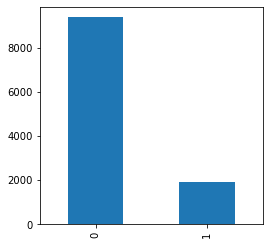

In [9]:
cust['Churn'].value_counts().plot(kind='bar',figsize=(4,4))

In [10]:
cust.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,11260,NaN,NaN,NaN,0.168384,0.374223,0,0,0,0,1
Tenure,11158,38,1,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148,NaN,NaN,NaN,1.65393,0.915015,1,1,1,3,3
CC_Contacted_LY,11158,NaN,NaN,NaN,17.8671,8.85327,4,11,16,23,132
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162,NaN,NaN,NaN,2.90253,0.725584,0,2,3,3,5
Account_user_count,11148,7,4,4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,11144,NaN,NaN,NaN,3.06649,1.37977,1,2,3,4,5


In [11]:
cust["Gender"] = cust["Gender"].replace("M", 'Male').replace("F", 'Female')

In [12]:
cust["account_segment"] = cust["account_segment"].replace("Regular +", 'Regular Plus').replace("Super +", 'Super Plus')

In [13]:
cust['Account_user_count'] = pd.to_numeric(cust['Account_user_count'],errors='coerce')

In [14]:
cust['Tenure'] = pd.to_numeric(cust['Tenure'],errors='coerce')

In [15]:
cust['rev_per_month'] = pd.to_numeric(cust['rev_per_month'],errors='coerce')

In [16]:
cust['rev_growth_yoy'] = pd.to_numeric(cust['rev_growth_yoy'],errors='coerce')

In [17]:
cust['Day_Since_CC_connect'] = pd.to_numeric(cust['Day_Since_CC_connect'],errors='coerce')

In [18]:
cust["Login_device"] = cust["Login_device"].replace("&&&&", 'No_info')

In [19]:
cust['coupon_used_for_payment'] = pd.to_numeric(cust['coupon_used_for_payment'],errors='coerce')

In [20]:
cust['cashback'] = pd.to_numeric(cust['cashback'],errors='coerce')

In [21]:
cust.head(15)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,160.0,Mobile
1,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,121.0,Mobile
2,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,Mobile
3,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.0,Mobile
4,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,130.0,Mobile
5,1,0.0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2.0,1.0,22.0,4.0,7.0,139.0,Computer
6,1,2.0,3.0,11.0,Cash on Delivery,Male,2.0,3.0,Super,2.0,Divorced,4.0,0.0,14.0,0.0,0.0,121.0,Mobile
7,1,0.0,1.0,6.0,Credit Card,Male,3.0,3.0,Regular Plus,2.0,Divorced,3.0,1.0,16.0,2.0,0.0,123.0,Mobile
8,1,13.0,3.0,9.0,E wallet,Male,2.0,4.0,Regular Plus,3.0,Divorced,2.0,1.0,14.0,0.0,2.0,127.0,Mobile
9,1,0.0,1.0,31.0,Debit Card,Male,2.0,5.0,Regular Plus,3.0,Single,2.0,0.0,12.0,1.0,1.0,123.0,Mobile


In [22]:
cust.describe(include="all")["Churn"]

count     11260.000000
unique             NaN
top                NaN
freq               NaN
mean          0.168384
std           0.374223
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Churn, dtype: float64

In [23]:
cust.skew()

Churn                      1.772606
Tenure                     3.895707
City_Tier                  0.737107
CC_Contacted_LY            1.422977
Service_Score              0.003891
Account_user_count        -0.393100
CC_Agent_Score            -0.142149
rev_per_month              9.093909
Complain_ly                0.950876
rev_growth_yoy             0.752474
coupon_used_for_payment    2.575199
Day_Since_CC_connect       1.273021
cashback                   8.771302
dtype: float64

In [24]:
missing_count = cust.isnull().sum() # the count of missing value
missing_df = pd.DataFrame({'count' : missing_count}) # create a dataframe
missing_df

,count
Churn,0
Tenure,218
City_Tier,112
CC_Contacted_LY,102
Payment,109
Gender,108
Service_Score,98
Account_user_count,444
account_segment,97
CC_Agent_Score,116


In [25]:
cust.isnull().sum().sort_values(ascending = False)/cust.index.size

rev_per_month              0.070249
cashback                   0.042007
Account_user_count         0.039432
Day_Since_CC_connect       0.031794
Complain_ly                0.031705
Login_device               0.019627
Tenure                     0.019361
Marital_Status             0.018828
CC_Agent_Score             0.010302
City_Tier                  0.009947
Payment                    0.009680
Gender                     0.009591
CC_Contacted_LY            0.009059
Service_Score              0.008703
account_segment            0.008615
rev_growth_yoy             0.000266
coupon_used_for_payment    0.000266
Churn                      0.000000
dtype: float64

In [26]:
cust['Payment'] = cust['Payment'].fillna("No_info")
cust['Gender'] = cust['Gender'].fillna("No_info")
cust['account_segment'] = cust['account_segment'].fillna("No_info")
cust['Marital_Status'] = cust['Marital_Status'].fillna("No_info")
cust['Login_device'] = cust['Login_device'].fillna("No_info")

In [27]:
for column in ['City_Tier', 'Account_user_count', 'Service_Score', 'CC_Agent_Score','CC_Contacted_LY','Complain_ly','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback','Tenure']:
    cust[column].fillna(cust[column].mode()[0], inplace=True)

In [28]:
missing_count = cust.isnull().sum() # the count of missing value
missing_df = pd.DataFrame({'count' : missing_count}) # create a dataframe
missing_df

,count
Churn,0
Tenure,0
City_Tier,0
CC_Contacted_LY,0
Payment,0
Gender,0
Service_Score,0
Account_user_count,0
account_segment,0
CC_Agent_Score,0


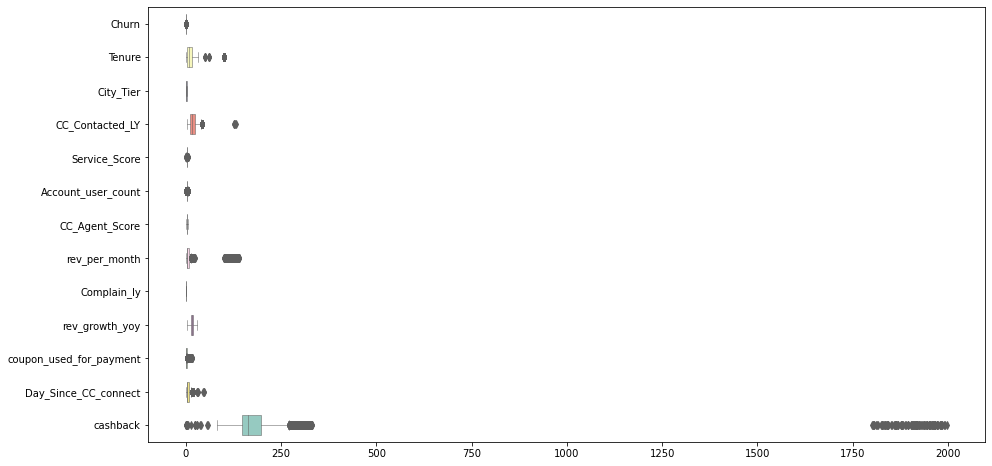

In [29]:
f, ax = plt.subplots(figsize=(15,8))
ax = sns.boxplot(data=cust,width=0.6,palette="Set3",orient='h',linewidth=0.5)

In [30]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [31]:
for feature in cust[['CC_Contacted_LY','rev_per_month','coupon_used_for_payment','cashback','Day_Since_CC_connect']]:
    lr,ur=treat_outlier(cust[feature])
    cust[feature]=np.where(cust[feature]>ur,ur,cust[feature])
    cust[feature]=np.where(cust[feature]<lr,lr,cust[feature])

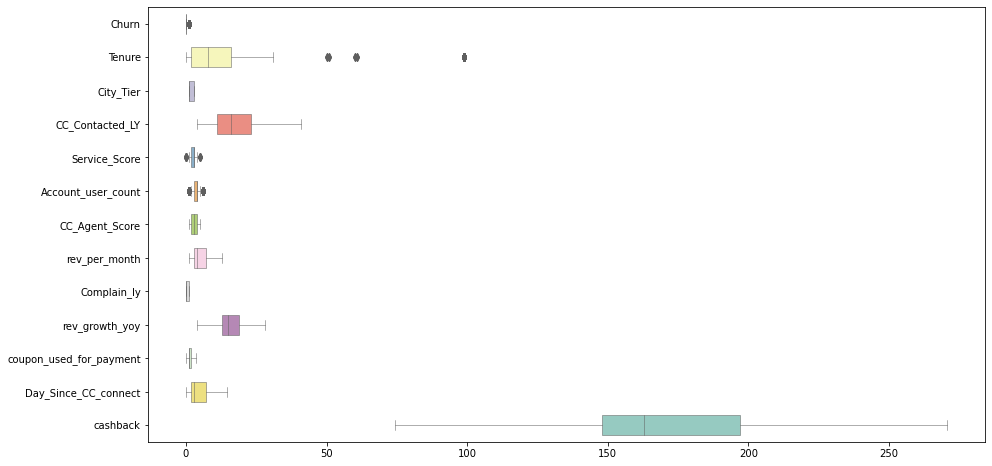

In [32]:
f, ax = plt.subplots(figsize=(15,8))
ax = sns.boxplot(data=cust,width=0.6,palette="Set3",orient='h',linewidth=0.5)

<AxesSubplot:>

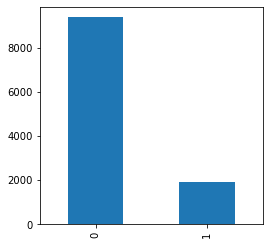

In [33]:
cust['Churn'].value_counts().plot(kind='bar',figsize=(4,4))

<AxesSubplot:>

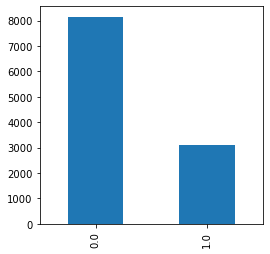

In [34]:
cust['Complain_ly'].value_counts().plot(kind='bar',figsize=(4,4))

<AxesSubplot:>

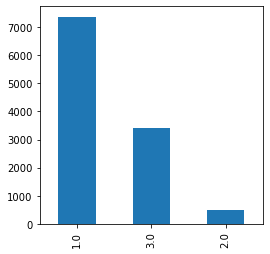

In [35]:
cust['City_Tier'].value_counts().plot(kind='bar',figsize=(4,4))

<AxesSubplot:>

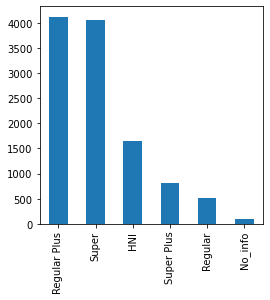

In [36]:
cust['account_segment'].value_counts().plot(kind='bar',figsize=(4,4))

<AxesSubplot:>

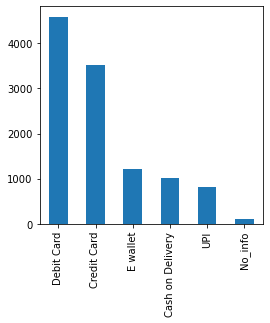

In [37]:
cust['Payment'].value_counts().plot(kind='bar',figsize=(4,4))

<AxesSubplot:>

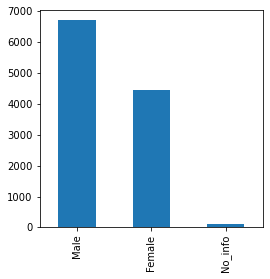

In [38]:
cust['Gender'].value_counts().plot(kind='bar',figsize=(4,4))

<AxesSubplot:>

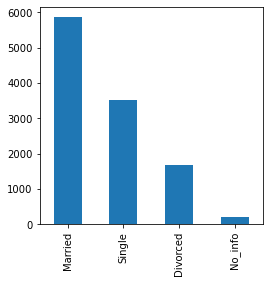

In [39]:
cust['Marital_Status'].value_counts().plot(kind='bar',figsize=(4,4))

<AxesSubplot:>

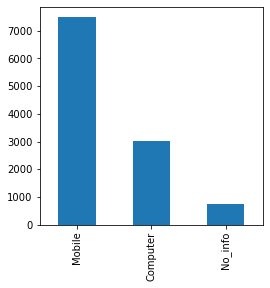

In [40]:
cust['Login_device'].value_counts().plot(kind='bar',figsize=(4,4))

<AxesSubplot:>

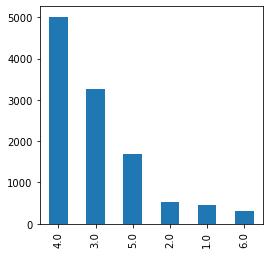

In [41]:
cust['Account_user_count'].value_counts().plot(kind='bar',figsize=(4,4))

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will 

Text(0.5, 1.0, 'CC_Agent_Score Boxplot')

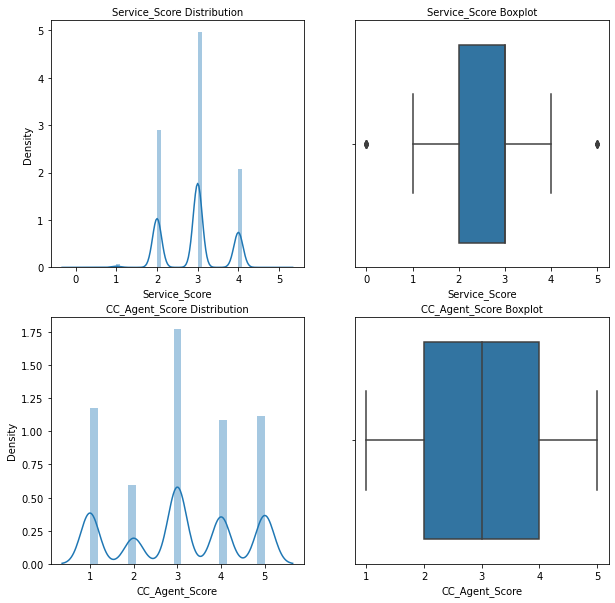

In [42]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)

a = sns.distplot(cust['Service_Score'] , ax=axes[0][0])
a.set_title("Service_Score Distribution",fontsize=10)
a = sns.boxplot(cust['Service_Score'] , orient = "v" , ax=axes[0][1])
a.set_title("Service_Score Boxplot",fontsize=10)

a=sns.distplot(cust['CC_Agent_Score'], ax=axes[1][0])
a.set_title("CC_Agent_Score Distribution",fontsize=10)
a=sns.boxplot(cust['CC_Agent_Score'],orient="v", ax=axes[1][1])
a.set_title("CC_Agent_Score Boxplot", fontsize=10)


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will 

Text(0.5, 1.0, 'Complain_ly Boxplot')

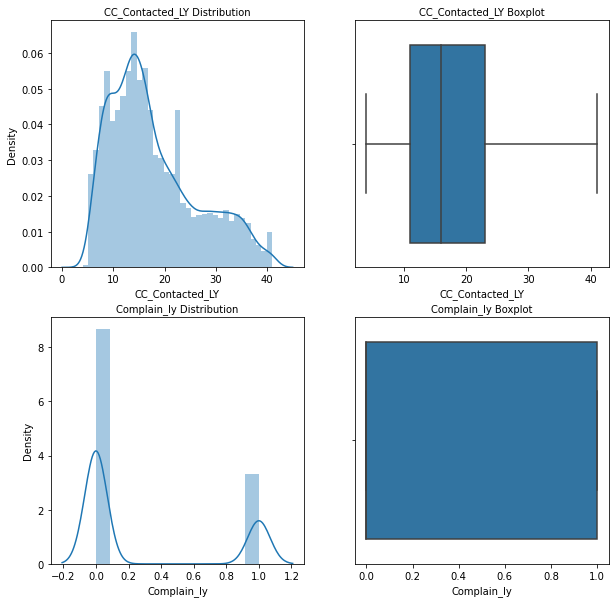

In [43]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)

a = sns.distplot(cust['CC_Contacted_LY'] , ax=axes[0][0])
a.set_title("CC_Contacted_LY Distribution",fontsize=10)
a = sns.boxplot(cust['CC_Contacted_LY'] , orient = "v" , ax=axes[0][1])
a.set_title("CC_Contacted_LY Boxplot",fontsize=10)

a=sns.distplot(cust['Complain_ly'], ax=axes[1][0])
a.set_title("Complain_ly Distribution",fontsize=10)
a=sns.boxplot(cust['Complain_ly'],orient="v", ax=axes[1][1])
a.set_title("Complain_ly Boxplot", fontsize=10)


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will 

Text(0.5, 1.0, 'Rev_growth_yoy Boxplot')

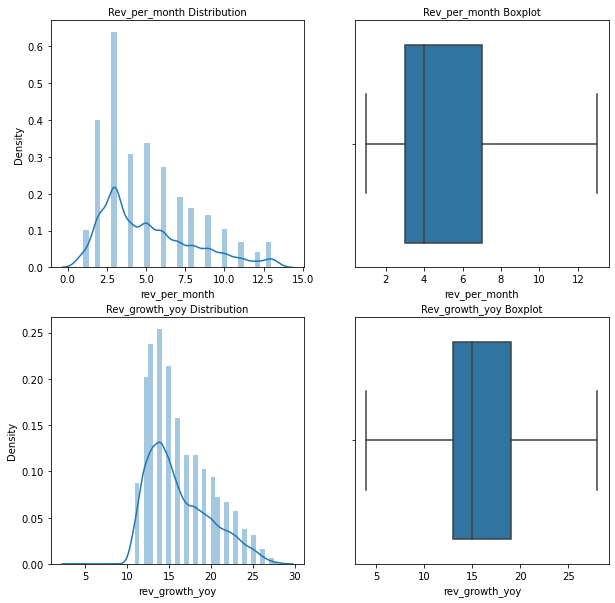

In [44]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)

a = sns.distplot(cust['rev_per_month'] , ax=axes[0][0])
a.set_title("Rev_per_month Distribution",fontsize=10)
a = sns.boxplot(cust['rev_per_month'] , orient = "v" , ax=axes[0][1])
a.set_title("Rev_per_month Boxplot",fontsize=10)

a = sns.distplot(cust['rev_growth_yoy'] , ax=axes[1][0])
a.set_title("Rev_growth_yoy Distribution",fontsize=10)
a = sns.boxplot(cust['rev_growth_yoy'] , orient = "v" , ax=axes[1][1])
a.set_title("Rev_growth_yoy Boxplot",fontsize=10)

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will 

Text(0.5, 1.0, 'Day_Since_CC_connect Boxplot')

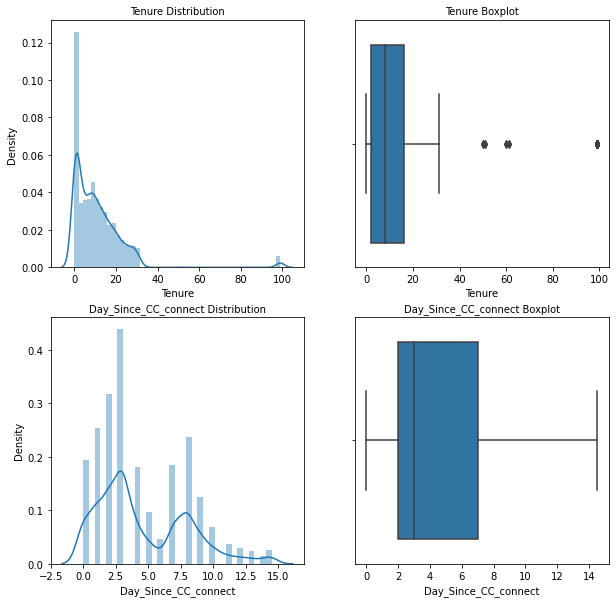

In [45]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)

a = sns.distplot(cust['Tenure'] , ax=axes[0][0])
a.set_title("Tenure Distribution",fontsize=10)
a = sns.boxplot(cust['Tenure'] , orient = "v" , ax=axes[0][1])
a.set_title("Tenure Boxplot",fontsize=10)

a = sns.distplot(cust['Day_Since_CC_connect'] , ax=axes[1][0])
a.set_title("Day_Since_CC_connect Distribution",fontsize=10)
a = sns.boxplot(cust['Day_Since_CC_connect'] , orient = "v" , ax=axes[1][1])
a.set_title("Day_Since_CC_connect Boxplot",fontsize=10)

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will 

Text(0.5, 1.0, 'Coupon_used_for_payment Boxplot')

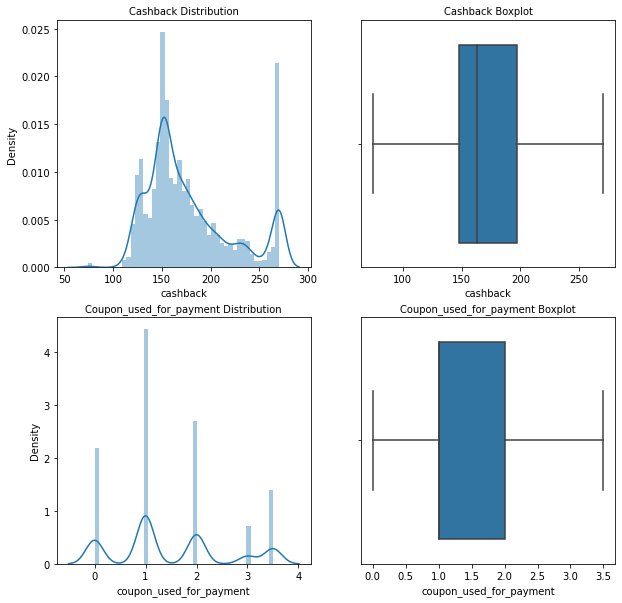

In [46]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)

a = sns.distplot(cust['cashback'] , ax=axes[0][0])
a.set_title("Cashback Distribution",fontsize=10)
a = sns.boxplot(cust['cashback'] , orient = "v" , ax=axes[0][1])
a.set_title("Cashback Boxplot",fontsize=10)

a = sns.distplot(cust['coupon_used_for_payment'] , ax=axes[1][0])
a.set_title("Coupon_used_for_payment Distribution",fontsize=10)
a = sns.boxplot(cust['coupon_used_for_payment'] , orient = "v" , ax=axes[1][1])
a.set_title("Coupon_used_for_payment Boxplot",fontsize=10)

In [47]:
Tenure_Group=pd.cut(cust.Tenure,bins=[0,12,24,36,48,60,99],labels=['1st Year','2nd Year','3rd Year','4th Year','5th Year','>5 years'])
cust.insert(7,'Tenure Group',Tenure_Group)


In [48]:
cust.tail(20)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Tenure Group,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11240,0,9.0,2.0,38.0,Debit Card,Female,3.0,1st Year,4.0,HNI,1.0,Single,3.0,1.0,17.0,2.0,8.0,213.0,No_info
11241,0,12.0,3.0,19.0,Debit Card,Female,4.0,1st Year,4.0,Super,1.0,Married,4.0,0.0,12.0,1.0,10.0,181.0,Mobile
11242,1,14.0,3.0,13.0,No_info,Male,4.0,2nd Year,4.0,Super,3.0,Married,11.0,0.0,13.0,2.0,2.0,197.0,No_info
11243,0,10.0,3.0,20.0,E wallet,Female,4.0,1st Year,5.0,Super,1.0,Married,9.0,0.0,15.0,2.0,1.0,194.0,Mobile
11244,0,19.0,3.0,29.0,Debit Card,Female,3.0,2nd Year,4.0,Super,3.0,Single,12.0,0.0,18.0,1.0,2.0,175.0,Mobile
11245,0,14.0,1.0,14.0,Debit Card,Male,1.0,2nd Year,5.0,Regular Plus,3.0,Single,6.0,0.0,16.0,1.0,3.0,153.0,Mobile
11246,0,9.0,1.0,29.0,Debit Card,Male,4.0,1st Year,4.0,Super,3.0,Married,3.0,1.0,16.0,1.0,3.0,187.0,Computer
11247,0,14.0,1.0,12.0,Credit Card,Female,4.0,2nd Year,4.0,Regular Plus,3.0,Married,3.0,0.0,15.0,1.0,3.0,145.0,Mobile
11248,0,9.0,1.0,13.0,Debit Card,Female,4.0,1st Year,6.0,Regular Plus,1.0,Married,6.0,0.0,15.0,2.0,2.0,158.0,Mobile
11249,0,3.0,1.0,23.0,UPI,Male,3.0,1st Year,5.0,Super,4.0,Married,8.0,1.0,14.0,1.0,4.0,171.0,Mobile


In [49]:
tenure_churn_table = pd.crosstab(index=cust["Tenure Group"], columns=cust["Churn"])
tenure_churn_table

Churn,0,1
Tenure Group,,
1st Year,5115,1023
2nd Year,2721,180
3rd Year,851,0
5th Year,6,0
>5 years,109,24


<AxesSubplot:xlabel='Tenure Group'>

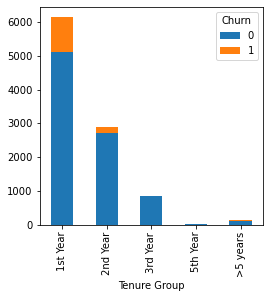

In [50]:
tenure_churn_table.plot(kind="bar", figsize=(4,4),stacked=True)

In [51]:
servscore_churn_table = pd.crosstab(index=cust["Service_Score"], columns=cust["Churn"])
servscore_churn_table


Churn,0,1
Service_Score,,
0.0,8,0
1.0,77,0
2.0,2701,550
3.0,4636,952
4.0,1937,394
5.0,5,0


<AxesSubplot:xlabel='Service_Score'>

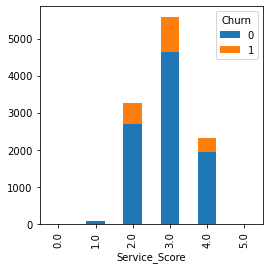

In [52]:
servscore_churn_table.plot(kind="bar", figsize=(4,4),stacked=True)

In [53]:
CCscore_churn_table = pd.crosstab(index=cust["CC_Agent_Score"], columns=cust["Churn"])
CCscore_churn_table


Churn,0,1
CC_Agent_Score,,
1.0,2038,264
2.0,1017,147
3.0,2877,599
4.0,1763,364
5.0,1669,522


<AxesSubplot:xlabel='CC_Agent_Score'>

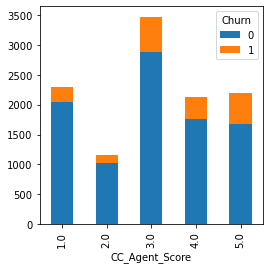

In [54]:
CCscore_churn_table.plot(kind="bar", figsize=(4,4),stacked=True)

<AxesSubplot:xlabel='Login_device'>

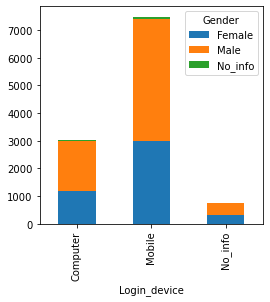

In [55]:
gender_device_table = pd.crosstab(index=cust["Login_device"], columns=cust["Gender"])
gender_device_table.plot(kind="bar", figsize=(4,4),stacked=True)

<AxesSubplot:xlabel='account_segment'>

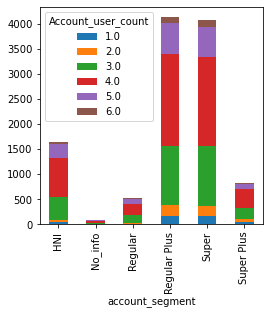

In [56]:
accountusers_segment_table = pd.crosstab(index=cust["account_segment"], columns=cust["Account_user_count"])
accountusers_segment_table.plot(kind="bar", figsize=(4,4),stacked=True)

In [57]:
accountusers_segment_table

Account_user_count,1.0,2.0,3.0,4.0,5.0,6.0
account_segment,,,,,,
HNI,42,50,463,774,273,37
No_info,0,3,27,46,18,3
Regular,10,15,160,231,84,20
Regular Plus,177,206,1177,1828,622,114
Super,170,200,1201,1768,592,131
Super Plus,47,52,233,366,110,10


<AxesSubplot:xlabel='account_segment'>

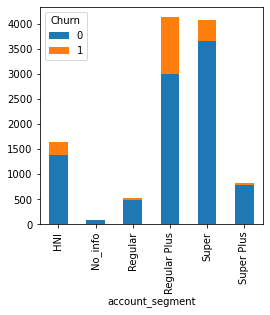

In [58]:
churn_segment_table = pd.crosstab(index=cust["account_segment"], columns=cust["Churn"])
churn_segment_table.plot(kind="bar", figsize=(4,4),stacked=True)

<AxesSubplot:xlabel='Complain_ly'>

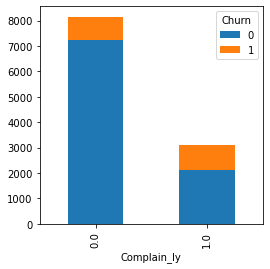

In [59]:
churn_segment_table = pd.crosstab(index=cust["Complain_ly"], columns=cust["Churn"])
churn_segment_table.plot(kind="bar", figsize=(4,4),stacked=True)

In [60]:
Cashback_Group=pd.cut(cust.cashback,bins=[0,50,100,150,200,250,300],labels=['<=50','51-100','101-150','151-200','201-250','251-300'])
cust.insert(11,'Cashback Group',Cashback_Group)

In [61]:
cust.head(35)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Tenure Group,Account_user_count,account_segment,CC_Agent_Score,Cashback Group,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,Debit Card,Female,3.0,1st Year,3.0,Super,2.0,151-200,Single,9.0,1.0,11.0,1.0,5.0,160.0,Mobile
1,1,0.0,1.0,8.0,UPI,Male,3.0,NaN,4.0,Regular Plus,3.0,101-150,Single,7.0,1.0,15.0,0.0,0.0,121.0,Mobile
2,1,0.0,1.0,30.0,Debit Card,Male,2.0,NaN,4.0,Regular Plus,3.0,151-200,Single,6.0,1.0,14.0,0.0,3.0,152.0,Mobile
3,1,0.0,3.0,15.0,Debit Card,Male,2.0,NaN,4.0,Super,5.0,101-150,Single,8.0,0.0,23.0,0.0,3.0,134.0,Mobile
4,1,0.0,1.0,12.0,Credit Card,Male,2.0,NaN,3.0,Regular Plus,5.0,101-150,Single,3.0,0.0,11.0,1.0,3.0,130.0,Mobile
5,1,0.0,1.0,22.0,Debit Card,Female,3.0,NaN,4.0,Regular Plus,5.0,101-150,Single,2.0,1.0,22.0,3.5,7.0,139.0,Computer
6,1,2.0,3.0,11.0,Cash on Delivery,Male,2.0,1st Year,3.0,Super,2.0,101-150,Divorced,4.0,0.0,14.0,0.0,0.0,121.0,Mobile
7,1,0.0,1.0,6.0,Credit Card,Male,3.0,NaN,3.0,Regular Plus,2.0,101-150,Divorced,3.0,1.0,16.0,2.0,0.0,123.0,Mobile
8,1,13.0,3.0,9.0,E wallet,Male,2.0,2nd Year,4.0,Regular Plus,3.0,101-150,Divorced,2.0,1.0,14.0,0.0,2.0,127.0,Mobile
9,1,0.0,1.0,31.0,Debit Card,Male,2.0,NaN,5.0,Regular Plus,3.0,101-150,Single,2.0,0.0,12.0,1.0,1.0,123.0,Mobile


In [62]:
churn_cashback_table = pd.crosstab(index=cust["Cashback Group"], columns=cust["Churn"])
churn_cashback_table

Churn,0,1
Cashback Group,,
51-100,22,0
101-150,2458,820
151-200,4498,783
201-250,1180,210
251-300,1206,83


<AxesSubplot:xlabel='Cashback Group'>

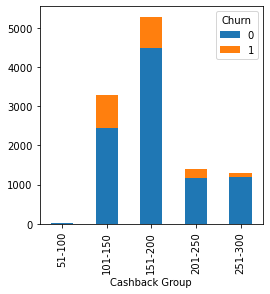

In [63]:
churn_cashback_table.plot(kind="bar", figsize=(4,4),stacked=True)

<AxesSubplot:xlabel='Account_user_count'>

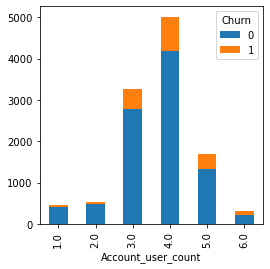

In [64]:
churn_accountusers_table = pd.crosstab(index=cust["Account_user_count"], columns=cust["Churn"])
churn_accountusers_table.plot(kind="bar", figsize=(4,4),stacked=True)

In [65]:
coupon_churn_table = pd.crosstab(index=cust["coupon_used_for_payment"], columns=cust["Churn"])
coupon_churn_table

Churn,0,1
coupon_used_for_payment,,
0.0,1776,374
1.0,3616,760
2.0,2210,446
3.0,602,96
3.5,1160,220


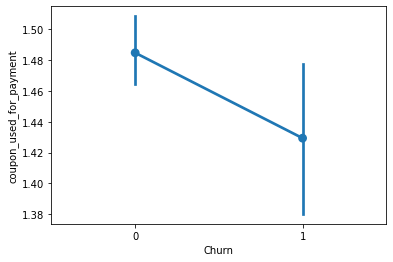

In [66]:
sns.pointplot(x = "Churn",
              y = "coupon_used_for_payment",
              data = cust)

plt.show()

<AxesSubplot:xlabel='Payment'>

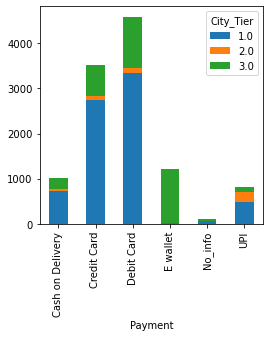

In [67]:
tier_paymeth_table = pd.crosstab(index=cust["Payment"], columns=cust["City_Tier"])
tier_paymeth_table.plot(kind="bar", figsize=(4,4),stacked=True)

In [68]:
tier_churn_table = pd.crosstab(index=cust["City_Tier"], columns=cust["Churn"])
tier_churn_table

Churn,0,1
City_Tier,,
1.0,6302,1073
2.0,384,96
3.0,2678,727


<AxesSubplot:xlabel='City_Tier'>

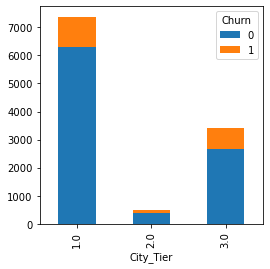

In [69]:
tier_churn_table.plot(kind="bar", figsize=(4,4),stacked=True)

In [70]:
cust = cust.drop(["Tenure Group"],axis=1)

In [71]:
cust = cust.drop(["Cashback Group"],axis=1)

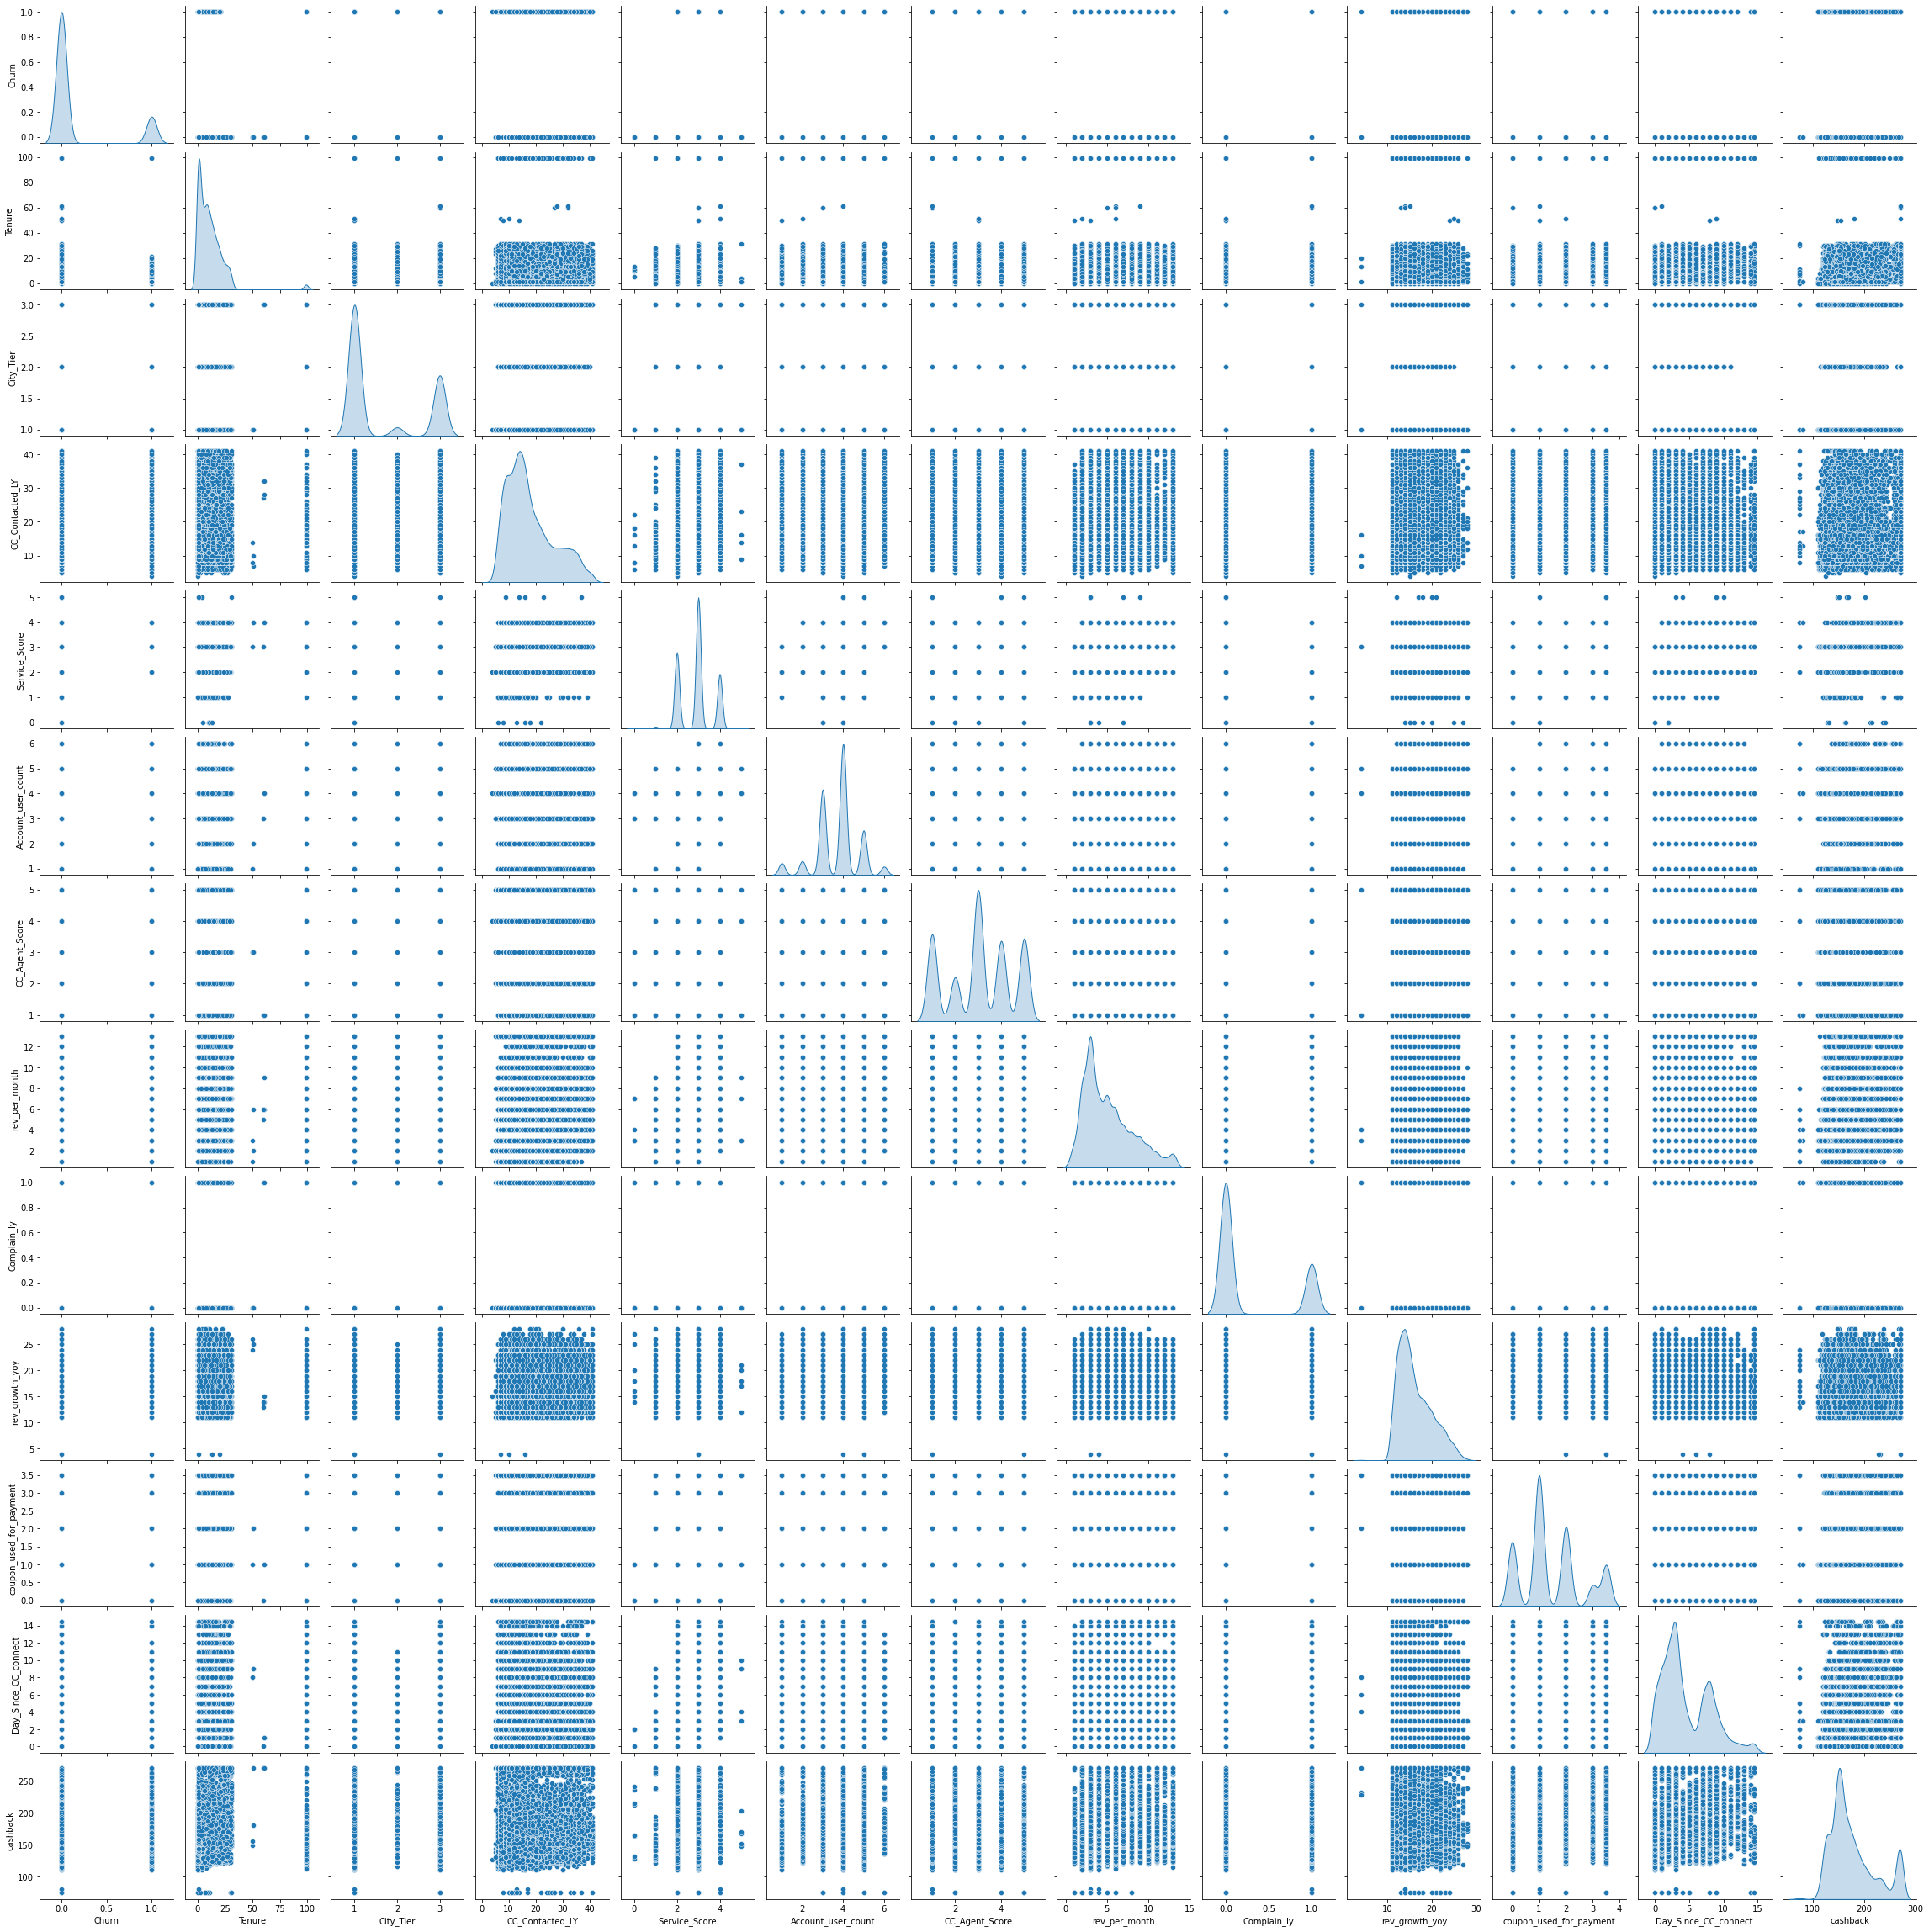

In [72]:
sns.pairplot(cust,diag_kind='kde')

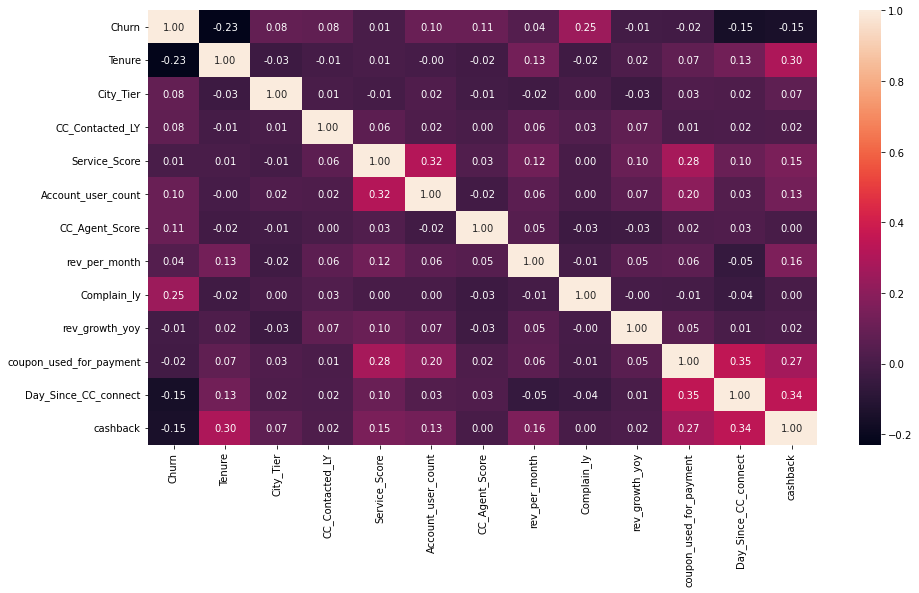

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap(cust.corr(),annot=True,fmt=".2f");

****************************************************************


# CODE FOR PROJECT NOTES 2

In [74]:
for col in cust.columns: 
    if  cust[col].dtype == 'object': 
        print('\n')
        print('Column Name:',col)
        print(pd.Categorical(cust[col].unique()))
        print(pd.Categorical(cust[col].unique()).codes)
        cust[col] = pd.Categorical(cust[col]).codes



Column Name: Payment
['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet', 'No_info']
Categories (6, object): ['Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'No_info', 'UPI']
[2 5 1 0 3 4]


Column Name: Gender
['Female', 'Male', 'No_info']
Categories (3, object): ['Female', 'Male', 'No_info']
[0 1 2]


Column Name: account_segment
['Super', 'Regular Plus', 'Regular', 'HNI', 'No_info', 'Super Plus']
Categories (6, object): ['HNI', 'No_info', 'Regular', 'Regular Plus', 'Super', 'Super Plus']
[4 3 2 0 1 5]


Column Name: Marital_Status
['Single', 'Divorced', 'Married', 'No_info']
Categories (4, object): ['Divorced', 'Married', 'No_info', 'Single']
[3 0 1 2]


Column Name: Login_device
['Mobile', 'Computer', 'No_info']
Categories (3, object): ['Computer', 'Mobile', 'No_info']
[1 0 2]


In [75]:
X=cust.drop('Churn',axis=1)  
Y=cust.pop('Churn')

In [76]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=0)

#LOGISTIC REGRESSION

In [77]:
lgmodel = LogisticRegression()
lgmodel.fit(X_train, Y_train)

C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [78]:
train_pred_lg=lgmodel.predict(X_train)
test_pred_lg =lgmodel.predict(X_test)

 confusion matrix  


Text(0.5, 1.0, 'Test Data')

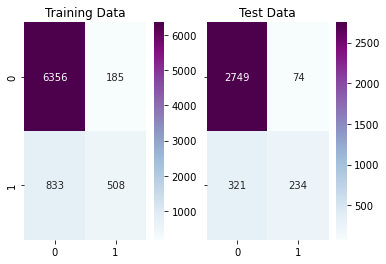

In [79]:
print(" confusion matrix  ")
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plot_0 = sns.heatmap(metrics.confusion_matrix(Y_train, train_pred_lg),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap(metrics.confusion_matrix(Y_test, test_pred_lg),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Test Data')

In [80]:
print("Logistic regression Classfication report  ")
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,train_pred_lg),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test, test_pred_lg),'\n')

Logistic regression Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.97      0.93      6541
           1       0.73      0.38      0.50      1341

    accuracy                           0.87      7882
   macro avg       0.81      0.68      0.71      7882
weighted avg       0.86      0.87      0.85      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2823
           1       0.76      0.42      0.54       555

    accuracy                           0.88      3378
   macro avg       0.83      0.70      0.74      3378
weighted avg       0.87      0.88      0.87      3378
 



In [81]:
from sklearn.metrics import accuracy_score

In [82]:
log_base_train_score =accuracy_score(Y_train,train_pred_lg)
log_base_train_score

0.8708449632073078

In [83]:
log_base_test_score =accuracy_score(Y_test,test_pred_lg)
log_base_test_score

0.8830669034931913

AUC and ROC FOR Logistic regression
AUC for the Training Data: 0.854
AUC for the Test Data: 0.866


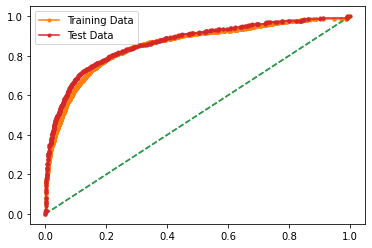

In [84]:
print("AUC and ROC FOR Logistic regression")
lg_pred_prob_train = lgmodel.predict_proba(X_train)
lg_pred_prob_train=lg_pred_prob_train[:,1]
lg_pred_prob_test = lgmodel.predict_proba(X_test)
lg_pred_prob_test =lg_pred_prob_test[:,1]

#training data
#AUC
lg_train_auc = metrics.roc_auc_score(Y_train,lg_pred_prob_train)
print('AUC for the Training Data: %.3f' % lg_train_auc)
#roc curve
lg_train_fpr, lg_train_tpr, thresholds = metrics.roc_curve(Y_train,lg_pred_prob_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg_train_fpr, lg_train_tpr, marker='.',label = 'Training Data')


#test data
#AUC
lg_test_auc = metrics.roc_auc_score(Y_test,lg_pred_prob_test)
print('AUC for the Test Data: %.3f' % lg_test_auc)
#roc curve
lg_test_fpr,lg_test_tpr, thresholds = metrics.roc_curve(Y_test,lg_pred_prob_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg_test_fpr, lg_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [85]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : [0.001,0.01,0.1,1,10,100,1000],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [86]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)  
clf.fit(X_train,Y_train)

C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [87]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8755391390502659


In [88]:
logreg = LogisticRegression(C = 10, 
                            penalty = 'l1', 
                            solver = 'liblinear')
logreg.fit(X_train,Y_train)
y_pred_train=logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

 confusion matrix


Text(0.5, 1.0, 'Test Data')

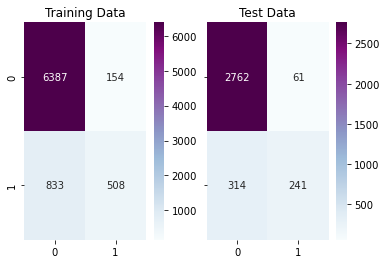

In [89]:
#LOGISTIC REGRESSION
print(" confusion matrix")
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plot_0 = sns.heatmap(metrics.confusion_matrix(Y_train, y_pred_train),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap(metrics.confusion_matrix(Y_test, y_pred_test),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Test Data')

In [90]:
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6541
           1       0.77      0.38      0.51      1341

    accuracy                           0.87      7882
   macro avg       0.83      0.68      0.72      7882
weighted avg       0.86      0.87      0.86      7882



In [91]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2823
           1       0.80      0.43      0.56       555

    accuracy                           0.89      3378
   macro avg       0.85      0.71      0.75      3378
weighted avg       0.88      0.89      0.87      3378



In [92]:
log_grid_train_score =accuracy_score(Y_train,y_pred_train)
log_grid_train_score

0.8747779751332149

In [93]:
log_grid_test_score =accuracy_score(Y_test,y_pred_test)
log_grid_test_score

0.88898756660746

AUC and ROC FOR Logistic regression
AUC for the Training Data: 0.858
AUC for the Test Data: 0.867


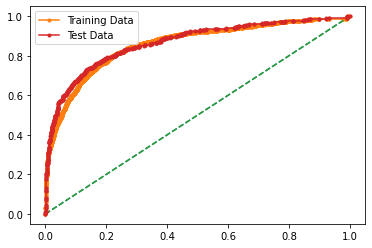

In [94]:
print("AUC and ROC FOR Logistic regression")
lg_pred_prob_train = logreg.predict_proba(X_train)
lg_pred_prob_train=lg_pred_prob_train[:,1]
lg_pred_prob_test = logreg.predict_proba(X_test)
lg_pred_prob_test =lg_pred_prob_test[:,1]

#training data
#AUC
lg1_train_auc = metrics.roc_auc_score(Y_train,lg_pred_prob_train)
print('AUC for the Training Data: %.3f' % lg1_train_auc)
#roc curve
lg_train_fpr, lg_train_tpr, thresholds = metrics.roc_curve(Y_train,lg_pred_prob_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg_train_fpr, lg_train_tpr, marker='.',label = 'Training Data')


#test data
#AUC
lg1_test_auc = metrics.roc_auc_score(Y_test,lg_pred_prob_test)
print('AUC for the Test Data: %.3f' % lg1_test_auc)
#roc curve
lg_test_fpr,lg_test_tpr, thresholds = metrics.roc_curve(Y_test,lg_pred_prob_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg_test_fpr, lg_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [95]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))
  

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1341
Before OverSampling, counts of label '0': 6541 

After OverSampling, the shape of train_X: (13082, 17)
After OverSampling, the shape of train_y: (13082,) 

After OverSampling, counts of label '1': 6541
After OverSampling, counts of label '0': 6541


In [96]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res)
sy_predict_train = lr1.predict(X_train_res)
  
# print classification report
print(classification_report(y_train_res, sy_predict_train))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      6541
           1       0.77      0.80      0.78      6541

    accuracy                           0.78     13082
   macro avg       0.78      0.78      0.78     13082
weighted avg       0.78      0.78      0.78     13082



C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [97]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res)
sy_predict_test = lr1.predict(X_test)
  
# print classification report
print(classification_report(Y_test, sy_predict_test))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2823
           1       0.38      0.78      0.51       555

    accuracy                           0.76      3378
   macro avg       0.66      0.77      0.68      3378
weighted avg       0.85      0.76      0.79      3378



C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [98]:
log_smote_train_score =accuracy_score(y_train_res,sy_predict_train)
log_smote_train_score

0.7799266167252714

In [99]:
log_smote_test_score =accuracy_score(Y_test,sy_predict_test)
log_smote_test_score

0.7575488454706927

 confusion matrix


Text(0.5, 1.0, 'Test Data')

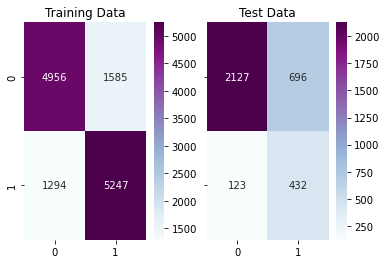

In [100]:
print(" confusion matrix")
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plot_0 = sns.heatmap(metrics.confusion_matrix(y_train_res, sy_predict_train),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap(metrics.confusion_matrix(Y_test, sy_predict_test),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Test Data')

AUC and ROC FOR Logistic regression
AUC for the Training Data: 0.856
AUC for the Test Data: 0.845


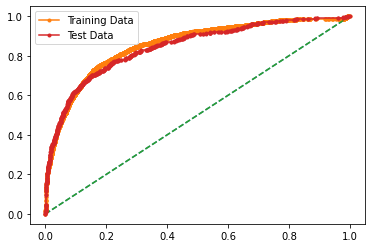

In [101]:
print("AUC and ROC FOR Logistic regression")
lg1_pred_prob_train = lr1.predict_proba(X_train_res)
lg1_pred_prob_train=lg1_pred_prob_train[:,1]
lg1_pred_prob_test = lr1.predict_proba(X_test)
lg1_pred_prob_test =lg1_pred_prob_test[:,1]

#training data
#AUC
lg2_train_auc = metrics.roc_auc_score(y_train_res,lg1_pred_prob_train)
print('AUC for the Training Data: %.3f' % lg2_train_auc)
#roc curve
lg1_train_fpr, lg1_train_tpr, lg1_thresholds = metrics.roc_curve(y_train_res,lg1_pred_prob_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg1_train_fpr, lg1_train_tpr, marker='.',label = 'Training Data')


#test data
#AUC
lg2_test_auc = metrics.roc_auc_score(Y_test,lg1_pred_prob_test)
print('AUC for the Test Data: %.3f' % lg2_test_auc)
#roc curve
lg1_test_fpr,lg1_test_tpr,lg1_thresholds = metrics.roc_curve(Y_test,lg1_pred_prob_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg1_test_fpr, lg1_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [102]:
lg_importance=lgmodel.coef_[0]
lg_importance=np.sort(lg_importance)
lg_importance

array([-0.30815669, -0.19171574, -0.18162774, -0.12156643, -0.11361906,
       -0.06797887, -0.06711689, -0.01334894,  0.02305471,  0.09158061,
        0.21852769,  0.23406371,  0.23529713,  0.30580443,  0.31174448,
        0.36499403,  1.43503503])

In [103]:
cd=pd.DataFrame({"Feature":X_train.columns,"Importance":abs(lg_importance)})
cd_desc=cd.sort_values(by='Importance', ascending=True)
cd_desc

,Feature,Importance
7,account_segment,0.013349
8,CC_Agent_Score,0.023055
6,Account_user_count,0.067117
5,Service_Score,0.067979
9,Marital_Status,0.091581
4,Gender,0.113619
3,Payment,0.121566
2,CC_Contacted_LY,0.181628
1,City_Tier,0.191716
10,rev_per_month,0.218528


Text(0.5, 0, 'Logistic Regression Feature Importance')

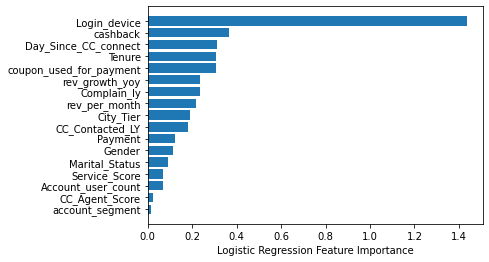

In [104]:
fig.set_size_inches(10,20)
plt.barh('Feature','Importance' ,data=cd_desc)
plt.xlabel("Logistic Regression Feature Importance")

In [105]:
log_importance=lr1.coef_[0]
log_importance=np.sort(log_importance)
log_importance

array([-0.66692421, -0.27091099, -0.25050572, -0.14272735, -0.13940189,
       -0.07004959, -0.06493616, -0.04162107, -0.00848275,  0.01742067,
        0.06893986,  0.18688112,  0.19773949,  0.33068769,  0.40262399,
        0.49817609,  1.45948609])

In [106]:
fd=pd.DataFrame({"Feature":X_train_res.columns,"Importance":abs(log_importance)})
fd_desc=fd.sort_values(by='Importance', ascending=True)
fd_desc

,Feature,Importance
8,CC_Agent_Score,0.008483
9,Marital_Status,0.017421
7,account_segment,0.041621
6,Account_user_count,0.064936
10,rev_per_month,0.068940
5,Service_Score,0.070050
4,Gender,0.139402
3,Payment,0.142727
11,Complain_ly,0.186881
12,rev_growth_yoy,0.197739


Text(0.5, 0, 'Logistic Regression Feature Importance')

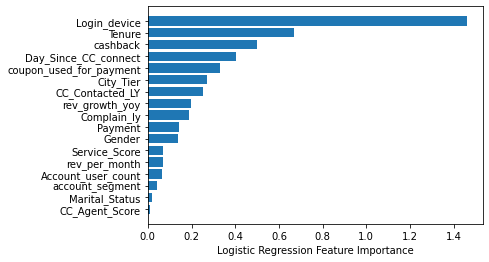

In [107]:
fig.set_size_inches(10,20)
plt.barh('Feature','Importance' ,data=fd_desc)
plt.xlabel("Logistic Regression Feature Importance")

In [108]:
#log base model
log_metrics=classification_report(Y_train, train_pred_lg,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_base_train_precision=round(df.loc["0"][0],2)
log_base_train_recall=round(df.loc["0"][1],2)
log_base_train_f1=round(df.loc["0"][2],2)
df.round(2)

,precision,recall,f1-score,support
0,0.88,0.97,0.93,6541.00
1,0.73,0.38,0.50,1341.00
accuracy,0.87,0.87,0.87,0.87
macro avg,0.81,0.68,0.71,7882.00
weighted avg,0.86,0.87,0.85,7882.00


In [109]:
log_metrics=classification_report(Y_test, test_pred_lg,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_base_test_precision=round(df.loc["0"][0],2)
log_base_test_recall=round(df.loc["0"][1],2)
log_base_test_f1=round(df.loc["0"][2],2)
df.round(2)

,precision,recall,f1-score,support
0,0.90,0.97,0.93,2823.00
1,0.76,0.42,0.54,555.00
accuracy,0.88,0.88,0.88,0.88
macro avg,0.83,0.70,0.74,3378.00
weighted avg,0.87,0.88,0.87,3378.00


In [110]:
#log grid model
log_metrics=classification_report(Y_train, y_pred_train,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_grid_train_precision=round(df.loc["0"][0],2)
log_grid_train_recall=round(df.loc["0"][1],2)
log_grid_train_f1=round(df.loc["0"][2],2)
df.round(2)

,precision,recall,f1-score,support
0,0.88,0.98,0.93,6541.00
1,0.77,0.38,0.51,1341.00
accuracy,0.87,0.87,0.87,0.87
macro avg,0.83,0.68,0.72,7882.00
weighted avg,0.86,0.87,0.86,7882.00


In [111]:
log_metrics=classification_report(Y_test, y_pred_test,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_grid_test_precision=round(df.loc["0"][0],2)
log_grid_test_recall=round(df.loc["0"][1],2)
log_grid_test_f1=round(df.loc["0"][2],2)
df.round(2)


,precision,recall,f1-score,support
0,0.90,0.98,0.94,2823.00
1,0.80,0.43,0.56,555.00
accuracy,0.89,0.89,0.89,0.89
macro avg,0.85,0.71,0.75,3378.00
weighted avg,0.88,0.89,0.87,3378.00


In [112]:
#log smote
log_metrics=classification_report(y_train_res, sy_predict_train,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_smote_train_precision=round(df.loc["0"][0],2)
log_smote_train_recall=round(df.loc["0"][1],2)
log_smote_train_f1=round(df.loc["0"][2],2)
df.round(2)

,precision,recall,f1-score,support
0,0.79,0.76,0.77,6541.00
1,0.77,0.80,0.78,6541.00
accuracy,0.78,0.78,0.78,0.78
macro avg,0.78,0.78,0.78,13082.00
weighted avg,0.78,0.78,0.78,13082.00


In [113]:
log_metrics=classification_report(Y_test, sy_predict_test,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_smote_test_precision=round(df.loc["0"][0],2)
log_smote_test_recall=round(df.loc["0"][1],2)
log_smote_test_f1=round(df.loc["0"][2],2)
df.round(2)

,precision,recall,f1-score,support
0,0.95,0.75,0.84,2823.00
1,0.38,0.78,0.51,555.00
accuracy,0.76,0.76,0.76,0.76
macro avg,0.66,0.77,0.68,3378.00
weighted avg,0.85,0.76,0.79,3378.00


In [114]:
index=['Accuracy','Recall','AUC','Precision','F1 Score']
data = pd.DataFrame({
       'Log Base Train':[log_base_train_score,log_base_train_recall,lg_train_auc,log_base_train_precision,log_base_train_f1],
       'Log Base Test':[log_base_test_score,log_base_test_recall,lg_test_auc,log_base_test_precision,log_base_test_f1],
       'Log Grid Train':[log_grid_train_score,log_grid_train_recall,lg1_train_auc,log_grid_train_precision,log_grid_train_f1],          
       'Log Grid Test':[log_grid_test_score,log_grid_test_recall,lg1_test_auc,log_grid_test_precision,log_grid_test_f1],
       'Log Smote Train':[log_smote_train_score,log_smote_train_recall,lg2_train_auc,log_smote_train_precision,log_smote_train_f1],
       'Log Smote Test':[log_smote_test_score,log_smote_test_recall,lg2_test_auc,log_smote_test_precision,log_smote_test_f1]} ,index=index)
data.round(2)

,Log Base Train,Log Base Test,Log Grid Train,Log Grid Test,Log Smote Train,Log Smote Test
Accuracy,0.87,0.88,0.87,0.89,0.78,0.76
Recall,0.97,0.97,0.98,0.98,0.76,0.75
AUC,0.85,0.87,0.86,0.87,0.86,0.85
Precision,0.88,0.90,0.88,0.90,0.79,0.95
F1 Score,0.93,0.93,0.93,0.94,0.77,0.84


#LINEAR DISCRIMINANT ANALYSIS

In [115]:
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train,Y_train)
lda_model

LinearDiscriminantAnalysis()

In [116]:
pred_class_train = lda_model.predict(X_train)
pred_class_test = lda_model.predict(X_test)
pred_class_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
pred_prob_train =lda_model.predict_proba(X_train)
pred_prob_test = lda_model.predict_proba(X_test)

In [118]:
lda_base_train_score =lda_model.score(X_train,Y_train)
lda_base_train_score

0.8661507231667089

In [119]:
lda_base_test_score = lda_model.score(X_test,Y_test)
lda_base_test_score

0.8759621077560686

 confusion matrix Train variables for LDA 


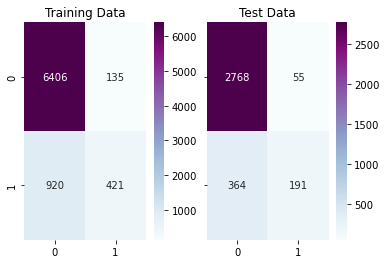

In [120]:
print(" confusion matrix Train variables for LDA ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train, pred_class_train)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [121]:
print(classification_report(Y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6541
           1       0.76      0.31      0.44      1341

    accuracy                           0.87      7882
   macro avg       0.82      0.65      0.68      7882
weighted avg       0.85      0.87      0.84      7882



In [122]:
print(classification_report(Y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2823
           1       0.78      0.34      0.48       555

    accuracy                           0.88      3378
   macro avg       0.83      0.66      0.70      3378
weighted avg       0.87      0.88      0.86      3378



AUC and ROC FOR LDA
AUC for the Training Data: 0.826
AUC for the Test Data: 0.836


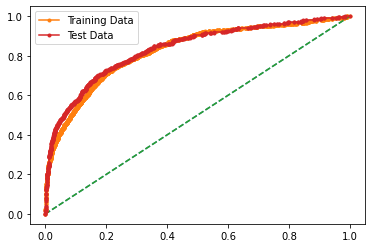

In [123]:
print("AUC and ROC FOR LDA")
lda_pred_prob_train = lda_model.predict_proba(X_train)
lda_pred_prob_train=lda_pred_prob_train[:,1]

lda_pred_prob_test = lda_model.predict_proba(X_test)
lda_pred_prob_test=lda_pred_prob_test[:,1]

#training data
#AUC
lda_train_auc = metrics.roc_auc_score(Y_train,lda_pred_prob_train)
print('AUC for the Training Data: %.3f' % lda_train_auc)
#roc curve
lda_train_fpr, lda_train_tpr, thresholds = metrics.roc_curve(Y_train,lda_pred_prob_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')


#test data
#AUC
lda_test_auc = metrics.roc_auc_score(Y_test,lda_pred_prob_test)
print('AUC for the Test Data: %.3f' % lda_test_auc)
#roc curve
lda_test_fpr, lda_test_tpr, thresholds = metrics.roc_curve(Y_test,lda_pred_prob_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [124]:
lda1 = LinearDiscriminantAnalysis()
lda1.fit(X_train_res, y_train_res)
lda1_predict_train = lda1.predict(X_train_res)
  
# print classification report
print(classification_report( y_train_res, lda1_predict_train))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      6541
           1       0.76      0.80      0.78      6541

    accuracy                           0.77     13082
   macro avg       0.77      0.77      0.77     13082
weighted avg       0.77      0.77      0.77     13082



In [125]:
lda1_predict_test = lda1.predict(X_test)
  
# print classification report
print(classification_report(Y_test, lda1_predict_test))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82      2823
           1       0.36      0.78      0.50       555

    accuracy                           0.74      3378
   macro avg       0.65      0.75      0.66      3378
weighted avg       0.85      0.74      0.77      3378



In [126]:
lda_smote_train_score =lda1.score(X_train_res,y_train_res)
lda_smote_train_score

0.769836416450084

In [127]:
lda_smote_test_score =lda1.score(X_test,Y_test)
lda_smote_test_score

0.7400828892835998

 confusion matrix Train variables for LDA 


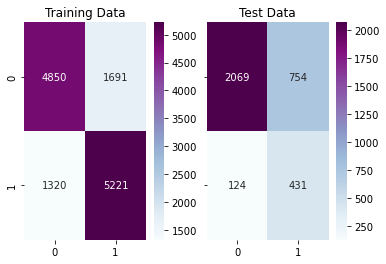

In [128]:
print(" confusion matrix Train variables for LDA ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res,lda1_predict_train)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,lda1_predict_test)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC and ROC FOR LDA
AUC for the Training Data: 0.845
AUC for the Test Data: 0.835


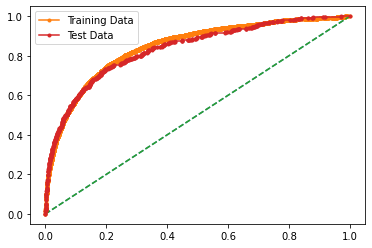

In [129]:
print("AUC and ROC FOR LDA")
lda1_pred_prob_train = lda1.predict_proba(X_train_res)
lda1_pred_prob_train=lda1_pred_prob_train[:,1]

lda1_pred_prob_test = lda1.predict_proba(X_test)
lda1_pred_prob_test=lda1_pred_prob_test[:,1]

#training data
#AUC
lda1_train_auc = metrics.roc_auc_score(y_train_res,lda1_pred_prob_train)
print('AUC for the Training Data: %.3f' % lda1_train_auc)
#roc curve
lda1_train_fpr, lda1_train_tpr, lda1_thresholds = metrics.roc_curve(y_train_res,lda1_pred_prob_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda1_train_fpr, lda1_train_tpr, marker='.',label = 'Training Data')


#test data
#AUC
lda1_test_auc = metrics.roc_auc_score(Y_test,lda1_pred_prob_test)
print('AUC for the Test Data: %.3f' % lda1_test_auc)
#roc curve
lda1_test_fpr, lda1_test_tpr, thresholds = metrics.roc_curve(Y_test,lda1_pred_prob_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda1_test_fpr, lda1_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [130]:
lda_importance=lda_model.coef_[0]
lda_importance=np.sort(lda_importance)
lda_importance

array([-0.17003658, -0.10808936, -0.10534667, -0.10133451, -0.04304438,
       -0.03089738, -0.02353402, -0.00738823,  0.02605883,  0.06424778,
        0.10668735,  0.30034752,  0.31755869,  0.33368763,  0.3591699 ,
        0.42930054,  1.74934313])

In [131]:
ld=pd.DataFrame({"Feature":X_train.columns,"Importance":abs(lda_importance)})
ld_desc=ld.sort_values(by='Importance', ascending=True)
ld_desc

,Feature,Importance
7,account_segment,0.007388
6,Account_user_count,0.023534
8,CC_Agent_Score,0.026059
5,Service_Score,0.030897
4,Gender,0.043044
9,Marital_Status,0.064248
3,Payment,0.101335
2,CC_Contacted_LY,0.105347
10,rev_per_month,0.106687
1,City_Tier,0.108089


Text(0.5, 0, 'Linear Discriminant Analysis Feature Importance')

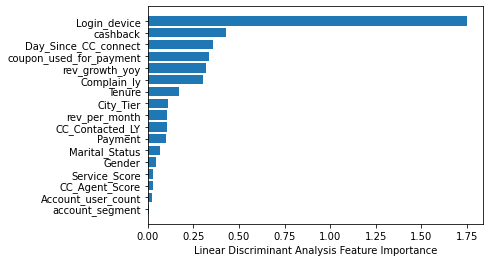

In [132]:
fig.set_size_inches(10,15)
plt.barh('Feature','Importance' ,data=ld_desc)
plt.xlabel("Linear Discriminant Analysis Feature Importance")

In [133]:
lda1_importance=lda1.coef_[0]
lda1_importance=np.sort(lda1_importance)
lda1_importance

array([-0.63570557, -0.28903188, -0.25116373, -0.14289472, -0.11716455,
       -0.05756879, -0.0470151 , -0.04377028, -0.00906598,  0.02256865,
        0.06527482,  0.16062983,  0.23459353,  0.32206022,  0.43489357,
        0.44104358,  1.73131047])

In [134]:
gd=pd.DataFrame({"Feature":X_train_res.columns,"Importance":abs(lda1_importance)})
gd_desc=gd.sort_values(by='Importance', ascending=True)
gd_desc

,Feature,Importance
8,CC_Agent_Score,0.009066
9,Marital_Status,0.022569
7,account_segment,0.043770
6,Account_user_count,0.047015
5,Service_Score,0.057569
10,rev_per_month,0.065275
4,Gender,0.117165
3,Payment,0.142895
11,Complain_ly,0.160630
12,rev_growth_yoy,0.234594


Text(0.5, 0, 'Linear Discriminant Analysis Feature Importance')

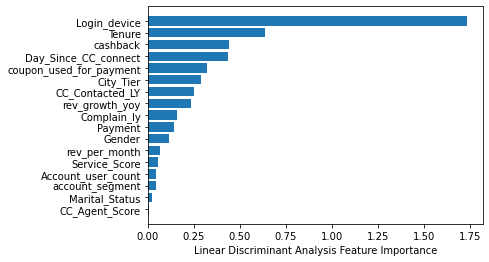

In [135]:
fig.set_size_inches(10,15)
plt.barh('Feature','Importance' ,data=gd_desc)
plt.xlabel("Linear Discriminant Analysis Feature Importance")

In [136]:
lda_metrics=classification_report(Y_train,pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_base_train_f1=round(df.loc["0"][2],2)
lda_base_train_recall=round(df.loc["0"][1],2)
lda_base_train_precision=round(df.loc["0"][0],2)
df.round(2)

,precision,recall,f1-score,support
0,0.87,0.98,0.92,6541.00
1,0.76,0.31,0.44,1341.00
accuracy,0.87,0.87,0.87,0.87
macro avg,0.82,0.65,0.68,7882.00
weighted avg,0.85,0.87,0.84,7882.00


In [137]:
lda_metrics=classification_report(Y_test,pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_base_test_f1=round(df.loc["0"][2],2)
lda_base_test_recall=round(df.loc["0"][1],2)
lda_base_test_precision=round(df.loc["0"][0],2)
df.round(2)

,precision,recall,f1-score,support
0,0.88,0.98,0.93,2823.00
1,0.78,0.34,0.48,555.00
accuracy,0.88,0.88,0.88,0.88
macro avg,0.83,0.66,0.70,3378.00
weighted avg,0.87,0.88,0.86,3378.00


In [138]:
lda_metrics=classification_report(y_train_res,lda1_predict_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_smote_train_f1=round(df.loc["0"][2],2)
lda_smote_train_recall=round(df.loc["0"][1],2)
lda_smote_train_precision=round(df.loc["0"][0],2)
df.round(2)

,precision,recall,f1-score,support
0,0.79,0.74,0.76,6541.00
1,0.76,0.80,0.78,6541.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.77,0.77,0.77,13082.00
weighted avg,0.77,0.77,0.77,13082.00


In [139]:
lda_metrics=classification_report(Y_test, lda1_predict_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_smote_test_f1=round(df.loc["0"][2],2)
lda_smote_test_recall=round(df.loc["0"][1],2)
lda_smote_test_precision=round(df.loc["0"][0],2)
df.round(2)

,precision,recall,f1-score,support
0,0.94,0.73,0.82,2823.00
1,0.36,0.78,0.50,555.00
accuracy,0.74,0.74,0.74,0.74
macro avg,0.65,0.75,0.66,3378.00
weighted avg,0.85,0.74,0.77,3378.00


In [140]:
index=['Accuracy','Recall','AUC','Precision','F1 Score']
data = pd.DataFrame({
       'LDA Base Train':[lda_base_train_score,lda_base_train_recall,lda_train_auc,lda_base_train_precision,lda_base_train_f1],
       'LDA Base Test':[lda_base_test_score,lda_base_test_recall,lda_test_auc,lda_base_test_precision,lda_base_test_f1],
       'LDA Smote Train':[lda_smote_train_score,lda_smote_train_recall,lda1_train_auc,lda_smote_train_precision,lda_smote_train_f1],
       'LDA Smote Test':[lda_smote_test_score,lda_smote_test_recall,lda1_test_auc,lda_smote_test_precision,lda_smote_test_f1]} ,index=index)
data.round(2)

,LDA Base Train,LDA Base Test,LDA Smote Train,LDA Smote Test
Accuracy,0.87,0.88,0.77,0.74
Recall,0.98,0.98,0.74,0.73
AUC,0.83,0.84,0.84,0.84
Precision,0.87,0.88,0.79,0.94
F1 Score,0.92,0.93,0.76,0.82


#DECISION TREE CLASSIFIER

In [141]:
dtcl = DecisionTreeClassifier(random_state=1)
dtcl.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [142]:
param_grid_dt = {
    'criterion': ['gini','entropy'],
    'max_depth': [10,20,30],
    'min_samples_leaf': [9,10,11,12], 
    'min_samples_split': [20,25,30],
}
gs_dtcl = GridSearchCV(dtcl, param_grid_dt, cv = 5, n_jobs = -1, verbose = 1)
gs_dtcl.fit(X_train,Y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [9, 10, 11, 12],
                         'min_samples_split': [20, 25, 30]},
             verbose=1)

In [143]:
print(gs_dtcl.best_params_)
best_grid = gs_dtcl.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 20}


DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=20,
                       random_state=1)

In [144]:
gs_dtcl.best_score_

0.9031974545255561

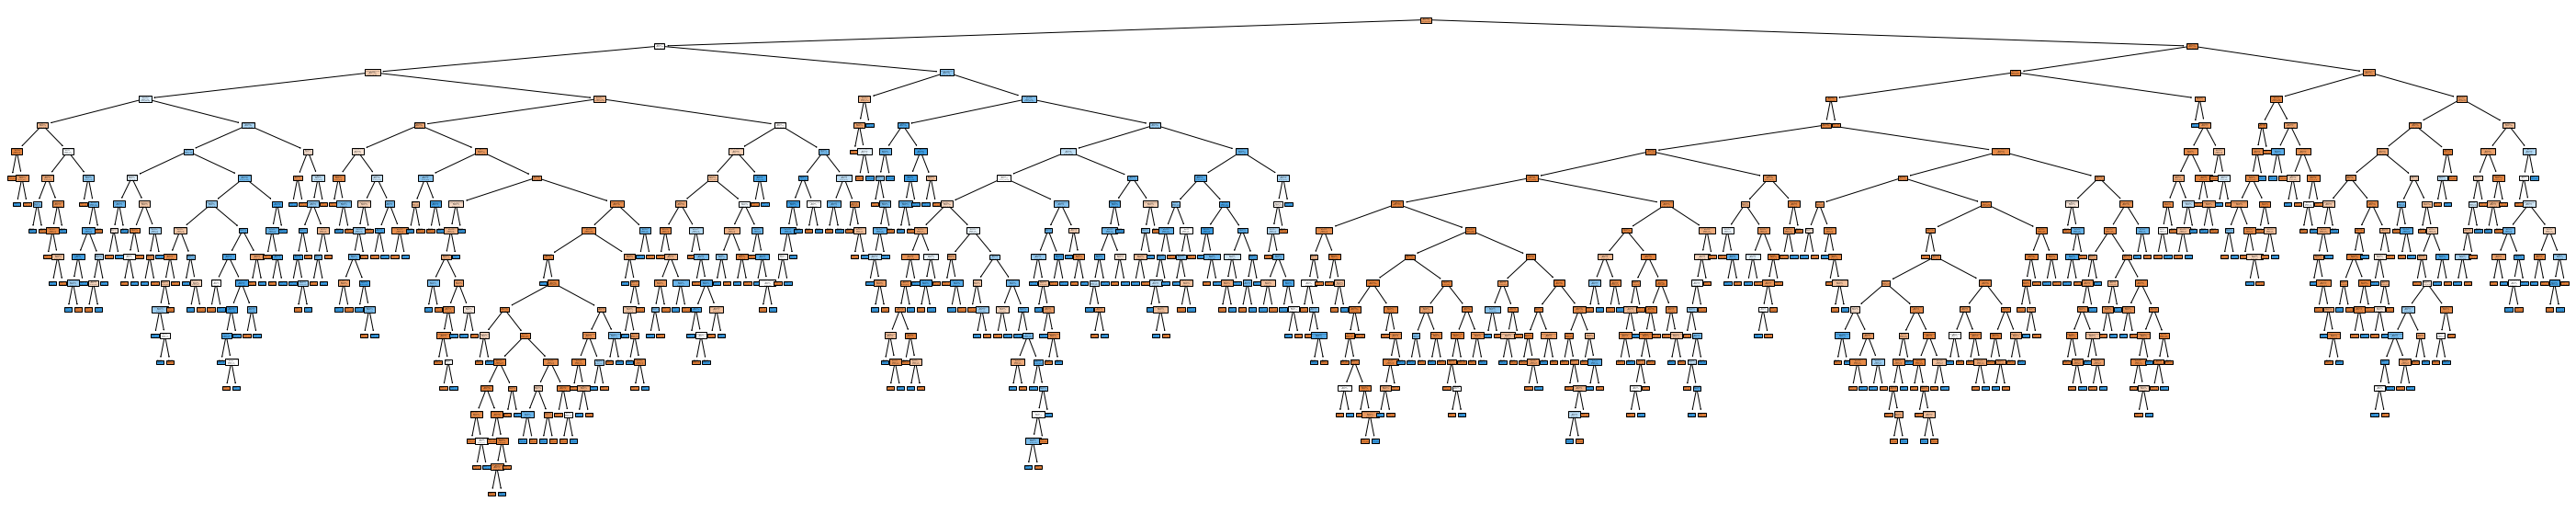

In [145]:
dot_data1 = tree.export_graphviz(dtcl, out_file=None , feature_names = list(X_train))
fig = plt.figure(figsize=(50,10))
_ = tree.plot_tree(dtcl, 
                   feature_names=list(X_train),  
                   filled=True)

In [146]:
dt_imp = pd.DataFrame(dtcl.feature_importances_, columns = ["Imp"], index = X_train.columns)
print(dt_imp)

                              Imp
Tenure                   0.302706
City_Tier                0.028293
CC_Contacted_LY          0.048909
Payment                  0.042781
Gender                   0.017460
Service_Score            0.018865
Account_user_count       0.029569
account_segment          0.043702
CC_Agent_Score           0.071479
Marital_Status           0.056643
rev_per_month            0.055946
Complain_ly              0.051665
rev_growth_yoy           0.049624
coupon_used_for_payment  0.014273
Day_Since_CC_connect     0.091607
cashback                 0.049160
Login_device             0.027316


In [147]:
reg_dtcl = DecisionTreeClassifier(criterion = 'gini',max_depth = 20,min_samples_leaf=10,min_samples_split=20)
reg_dtcl.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=20)

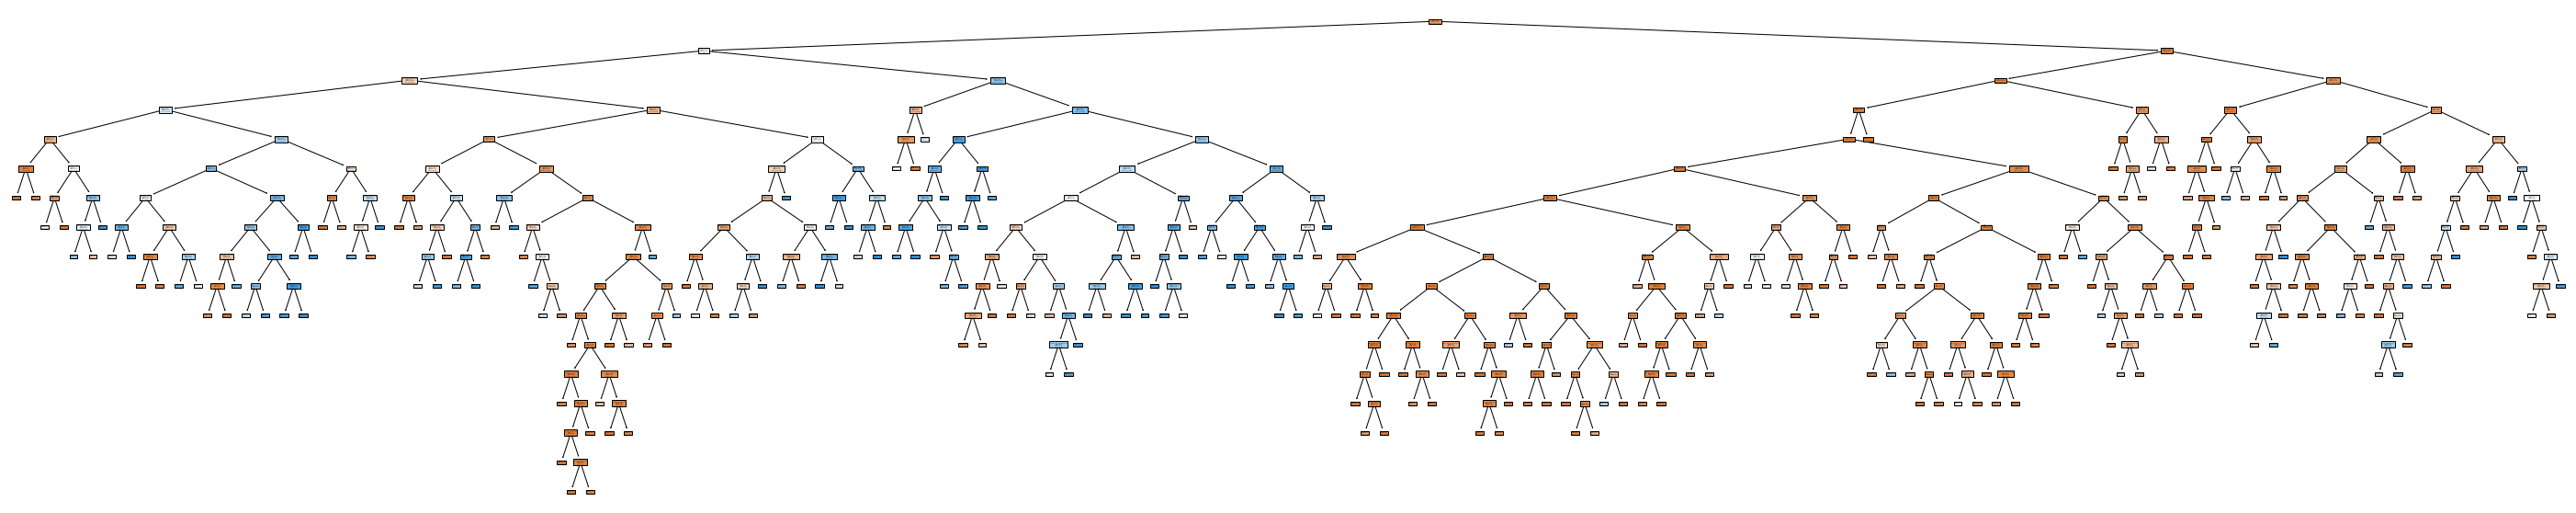

In [148]:
dot_data2 = tree.export_graphviz(reg_dtcl, out_file=None , feature_names = list(X_train))
fig = plt.figure(figsize=(50,10))
_ = tree.plot_tree(reg_dtcl, 
                   feature_names=list(X_train),  
                   filled=True)

In [149]:
ytrain_predict = reg_dtcl.predict(X_train)
ytest_predict = reg_dtcl.predict(X_test)
ytrain_predict_prob=best_grid.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [150]:
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


 confusion matrix Train variables for DTCL 


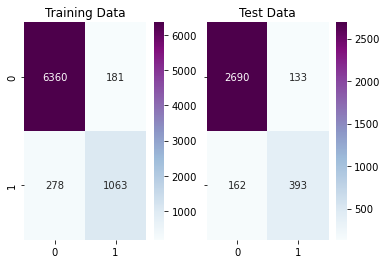

In [151]:
print(" confusion matrix Train variables for DTCL ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train, ytrain_predict)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,ytest_predict)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [152]:
cart_grid_train_score=best_grid.score(X_train,Y_train) 
cart_grid_train_score

0.9417660492260848

In [153]:
cart_grid_test_score=best_grid.score(X_test,Y_test)
cart_grid_test_score

0.9153345174659562

In [154]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6541
           1       0.85      0.79      0.82      1341

    accuracy                           0.94      7882
   macro avg       0.91      0.88      0.89      7882
weighted avg       0.94      0.94      0.94      7882



In [155]:
print(classification_report(Y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2823
           1       0.75      0.71      0.73       555

    accuracy                           0.91      3378
   macro avg       0.85      0.83      0.84      3378
weighted avg       0.91      0.91      0.91      3378



AUC: 0.984
AUC: 0.943


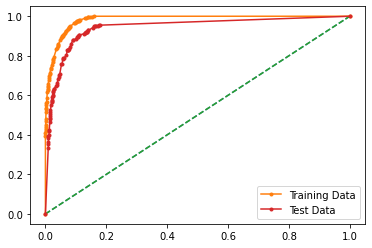

In [156]:
probstrain = reg_dtcl.predict_proba(X_train)
probstrain = probstrain[:, 1]
probstest = reg_dtcl.predict_proba(X_test)
probstest = probstest[:, 1]


# calculate AUC
from sklearn.metrics import roc_auc_score
cart_grid_train_auc = roc_auc_score(Y_train,probstrain)
print('AUC: %.3f' % cart_grid_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(Y_train, probstrain)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.',label = 'Training Data')


# calculate AUC
from sklearn.metrics import roc_auc_score
cart_grid_test_auc = roc_auc_score(Y_test, probstest)
print('AUC: %.3f' % cart_grid_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(Y_test,probstest)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.',label='Test Data')

# show the plot
plt.legend(loc='best')
plt.show()


In [157]:
dtcl1 =DecisionTreeClassifier()
dtcl1.fit(X_train_res, y_train_res)
dy_predict_train = dtcl1.predict(X_train_res)
  
# print classification report
print(classification_report(y_train_res, dy_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6541
           1       1.00      1.00      1.00      6541

    accuracy                           1.00     13082
   macro avg       1.00      1.00      1.00     13082
weighted avg       1.00      1.00      1.00     13082



In [158]:
dy_predict_test = dtcl1.predict(X_test)
  
# print classification report
print(classification_report(Y_test, dy_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2823
           1       0.80      0.82      0.81       555

    accuracy                           0.94      3378
   macro avg       0.88      0.89      0.89      3378
weighted avg       0.94      0.94      0.94      3378



In [159]:
cart_smote_train_score=dtcl1.score(X_train_res,y_train_res) 
cart_smote_train_score

1.0

In [160]:
cart_smote_test_score=dtcl1.score(X_test,Y_test) 
cart_smote_test_score

0.9360568383658969

 confusion matrix Train variables for DTCL 


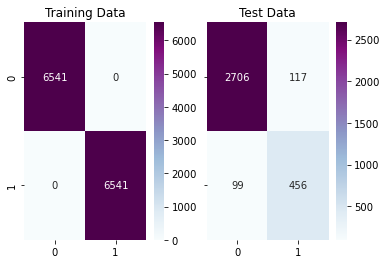

In [161]:
print(" confusion matrix Train variables for DTCL ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res, dy_predict_train)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,dy_predict_test)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Test Data');


AUC: 1.000
AUC: 0.890


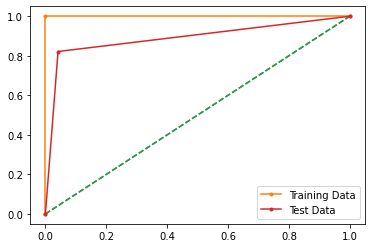

In [162]:
#AUC and ROC for the training data

# predict probabilities
probstrain1 = dtcl1.predict_proba(X_train_res)

# keep probabilities for the positive outcome only
probstrain1 = probstrain1[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
cart_smote_train_auc = roc_auc_score(y_train_res, probstrain1)
print('AUC: %.3f' % cart_smote_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
dtcl1_train_fpr, dtcl1_train_tpr, dtcl1train_thresholds = roc_curve(y_train_res, probstrain1)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(dtcl1_train_fpr, dtcl1_train_tpr, marker='.',label = 'Training Data')

# predict probabilities
probstest1 = dtcl1.predict_proba(X_test)

# keep probabilities for the positive outcome only
probstest1 = probstest1[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
cart_smote_test_auc = roc_auc_score(Y_test, probstest1)
print('AUC: %.3f' % cart_smote_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
dtcl1_test_fpr, dtcl1_test_tpr, dtcl1test_thresholds = roc_curve(Y_test, probstest1)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(dtcl1_test_fpr, dtcl1_test_tpr, marker='.',label = 'Test Data')


# show the plot
plt.legend(loc='best')
plt.show()

In [163]:
dtcl2 =DecisionTreeClassifier()
param_grid_dt = {
    'criterion': ['gini','entropy'],
    'max_depth': [10,20,30],
    'min_samples_leaf': [9,10,11,12], 
    'min_samples_split': [20,25,30],
}
gs_dtcl2 = GridSearchCV(dtcl2, param_grid_dt, cv = 5, n_jobs = -1, verbose = 1)
gs_dtcl2.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [9, 10, 11, 12],
                         'min_samples_split': [20, 25, 30]},
             verbose=1)

In [164]:
print(gs_dtcl2.best_params_)
best_grid1 = gs_dtcl2.best_estimator_
best_grid1

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 9, 'min_samples_split': 20}


DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=9,
                       min_samples_split=20)

In [165]:
reg_dtcl2 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 20,min_samples_leaf=9,min_samples_split=20)
reg_dtcl2.fit(X_train_res, y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=9,
                       min_samples_split=20)

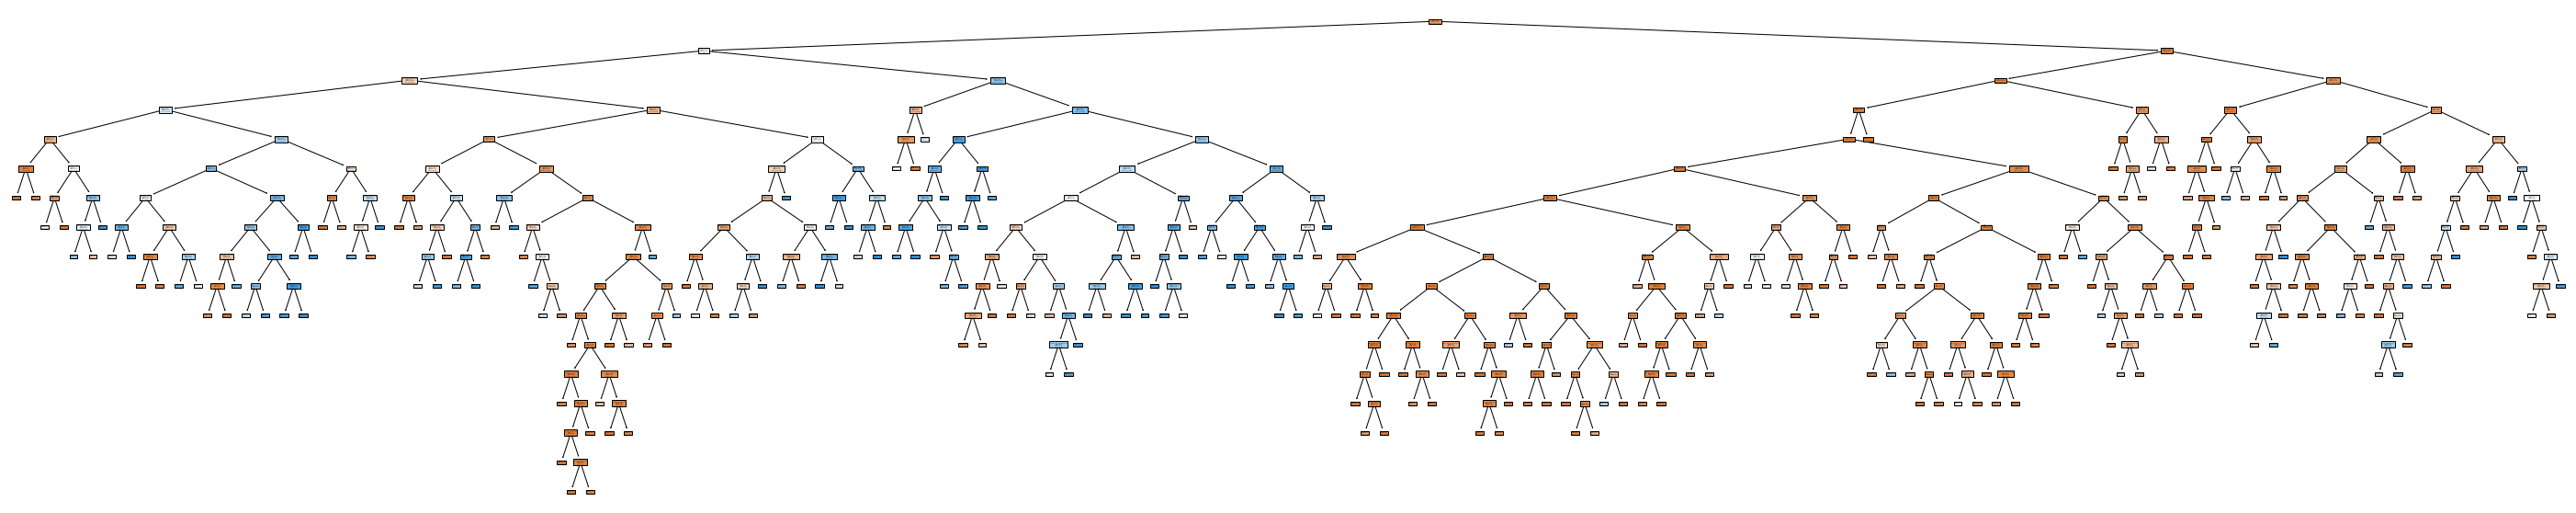

In [166]:
dot_data2 = tree.export_graphviz(reg_dtcl2, out_file=None , feature_names = list(X_train))
fig = plt.figure(figsize=(50,10))
_ = tree.plot_tree(reg_dtcl, 
                   feature_names=list(X_train),  
                   filled=True)

In [167]:
ytrain_predictdt = reg_dtcl2.predict(X_train_res)
ytest_predictdt = reg_dtcl2.predict(X_test)
ytrain_predict_probdt=best_grid1.predict_proba(X_train_res)
ytest_predict_probdt=best_grid1.predict_proba(X_test)

In [168]:
print(classification_report(y_train_res, ytrain_predictdt))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6541
           1       0.96      0.96      0.96      6541

    accuracy                           0.96     13082
   macro avg       0.96      0.96      0.96     13082
weighted avg       0.96      0.96      0.96     13082



In [169]:
print(classification_report(Y_test, ytest_predictdt))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2823
           1       0.71      0.77      0.74       555

    accuracy                           0.91      3378
   macro avg       0.83      0.85      0.84      3378
weighted avg       0.91      0.91      0.91      3378



In [170]:
cart_grid_smote_train_score=reg_dtcl2.score(X_train_res,y_train_res) 
cart_grid_smote_train_score

0.9626203944351016

In [171]:
cart_grid_smote_test_score=reg_dtcl2.score(X_test,Y_test) 
cart_grid_smote_test_score

0.9097098875074008

 confusion matrix Train variables for DTCL 


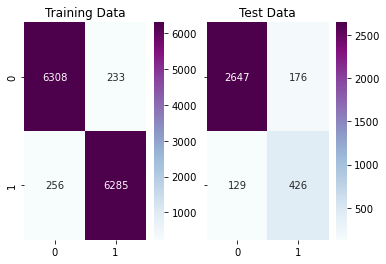

In [172]:
print(" confusion matrix Train variables for DTCL ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res, ytrain_predictdt)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,ytest_predictdt)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Test Data');


AUC: 0.996
AUC: 0.937


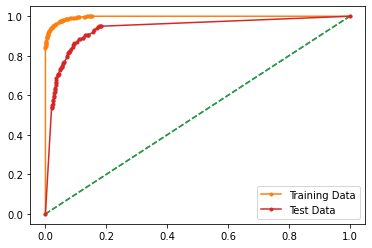

In [173]:
# predict probabilities
probstrain2 = reg_dtcl2.predict_proba(X_train_res)

# keep probabilities for the positive outcome only
probstrain2 = probstrain2[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
cart_grid_smote_train_auc = roc_auc_score(y_train_res, probstrain2)
print('AUC: %.3f' % cart_grid_smote_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
dtcl2_train_fpr, dtcl2_train_tpr, dtcl2train_thresholds = roc_curve(y_train_res, probstrain2)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(dtcl2_train_fpr, dtcl2_train_tpr, marker='.',label = 'Training Data')

# predict probabilities
probstest2 = reg_dtcl2.predict_proba(X_test)

# keep probabilities for the positive outcome only
probstest2 = probstest2[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
cart_grid_smote_test_auc = roc_auc_score(Y_test, probstest2)
print('AUC: %.3f' % cart_grid_smote_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
dtcl2_test_fpr, dtcl2_test_tpr, dtcl2test_thresholds = roc_curve(Y_test, probstest2)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(dtcl2_test_fpr, dtcl2_test_tpr, marker='.',label = 'Test Data')


# show the plot
plt.legend(loc='best')
plt.show()

In [174]:
cart_metrics=classification_report(Y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_grid_train_f1=round(df.loc["0"][2],2)
cart_grid_train_recall=round(df.loc["0"][1],2)
cart_grid_train_precision=round(df.loc["0"][0],2)
df.round(2)

,precision,recall,f1-score,support
0,0.96,0.97,0.97,6541.00
1,0.85,0.79,0.82,1341.00
accuracy,0.94,0.94,0.94,0.94
macro avg,0.91,0.88,0.89,7882.00
weighted avg,0.94,0.94,0.94,7882.00


In [175]:
cart_metrics=classification_report(Y_test,ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_grid_test_precision=round(df.loc["0"][0],2)
cart_grid_test_recall=round(df.loc["0"][1],2)
cart_grid_test_f1=round(df.loc["0"][2],2)
df.round(2)

,precision,recall,f1-score,support
0,0.94,0.95,0.95,2823.00
1,0.75,0.71,0.73,555.00
accuracy,0.91,0.91,0.91,0.91
macro avg,0.85,0.83,0.84,3378.00
weighted avg,0.91,0.91,0.91,3378.00


In [176]:
cart_metrics=classification_report(y_train_res, dy_predict_train,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_smote_train_f1=round(df.loc["0"][2],2)
cart_smote_train_recall=round(df.loc["0"][1],2)
cart_smote_train_precision=round(df.loc["0"][0],2)
df.round(2)

,precision,recall,f1-score,support
0,1.0,1.0,1.0,6541.0
1,1.0,1.0,1.0,6541.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,13082.0
weighted avg,1.0,1.0,1.0,13082.0


In [177]:
cart_metrics=classification_report(Y_test,dy_predict_test,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_smote_test_precision=round(df.loc["0"][0],2)
cart_smote_test_recall=round(df.loc["0"][1],2)
cart_smote_test_f1=round(df.loc["0"][2],2)
df.round(2)

,precision,recall,f1-score,support
0,0.96,0.96,0.96,2823.00
1,0.80,0.82,0.81,555.00
accuracy,0.94,0.94,0.94,0.94
macro avg,0.88,0.89,0.89,3378.00
weighted avg,0.94,0.94,0.94,3378.00


In [178]:
cart_metrics=classification_report(y_train_res,ytrain_predictdt,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_grid_smote_train_f1=round(df.loc["0"][2],2)
cart_grid_smote_train_recall=round(df.loc["0"][1],2)
cart_grid_smote_train_precision=round(df.loc["0"][0],2)
df.round(2)

,precision,recall,f1-score,support
0,0.96,0.96,0.96,6541.00
1,0.96,0.96,0.96,6541.00
accuracy,0.96,0.96,0.96,0.96
macro avg,0.96,0.96,0.96,13082.00
weighted avg,0.96,0.96,0.96,13082.00


In [179]:
cart_metrics=classification_report(Y_test,ytest_predictdt,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_grid_smote_test_precision=round(df.loc["0"][0],2)
cart_grid_smote_test_recall=round(df.loc["0"][1],2)
cart_grid_smote_test_f1=round(df.loc["0"][2],2)
df.round(2)

,precision,recall,f1-score,support
0,0.95,0.94,0.95,2823.00
1,0.71,0.77,0.74,555.00
accuracy,0.91,0.91,0.91,0.91
macro avg,0.83,0.85,0.84,3378.00
weighted avg,0.91,0.91,0.91,3378.00


In [180]:
index=['Accuracy','Recall','AUC','Precision','F1 Score']
data = pd.DataFrame({
       'DTCL Grid Train':[cart_grid_train_score,cart_grid_train_recall,cart_grid_train_auc,cart_grid_train_precision,cart_grid_train_f1],
       'DTCL Grid Test':[cart_grid_test_score,cart_grid_test_recall,cart_grid_test_auc,cart_grid_test_precision,cart_grid_test_f1],
       'DTCL Smote Train':[cart_smote_train_score,cart_smote_train_recall,cart_smote_train_auc,cart_smote_train_precision,cart_smote_train_f1],
       'DTCL Smote Test':[cart_smote_test_score,cart_smote_test_recall,cart_smote_test_auc,cart_smote_test_precision,cart_smote_test_f1] ,
       'DTCL Grid Smote Train':[cart_grid_smote_train_score,cart_grid_smote_train_recall,cart_grid_smote_train_auc,cart_grid_smote_train_precision,cart_grid_smote_train_f1],
       'DTCL Grid Smote Test':[cart_grid_smote_test_score,cart_grid_smote_test_recall,cart_grid_smote_test_auc,cart_grid_smote_test_precision,cart_grid_smote_test_f1]}, index=index)
data.round(2)

,DTCL Grid Train,DTCL Grid Test,DTCL Smote Train,DTCL Smote Test,DTCL Grid Smote Train,DTCL Grid Smote Test
Accuracy,0.94,0.92,1.0,0.94,0.96,0.91
Recall,0.97,0.95,1.0,0.96,0.96,0.94
AUC,0.98,0.94,1.0,0.89,1.00,0.94
Precision,0.96,0.94,1.0,0.96,0.96,0.95
F1 Score,0.97,0.95,1.0,0.96,0.96,0.95


In [181]:
reg_dt_imp1 = pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], 
                          index = X_train.columns).sort_values('Imp',ascending=False)
print(reg_dt_imp1)

                              Imp
Tenure                   0.404525
Day_Since_CC_connect     0.083203
Complain_ly              0.071301
CC_Agent_Score           0.063465
rev_growth_yoy           0.055698
Marital_Status           0.055514
rev_per_month            0.045003
account_segment          0.036506
Login_device             0.033270
CC_Contacted_LY          0.030206
City_Tier                0.029783
Account_user_count       0.023766
cashback                 0.023231
Payment                  0.016987
Gender                   0.013064
coupon_used_for_payment  0.008921
Service_Score            0.005557


Text(0.5, 0, 'Decision Tree Feature Importance')

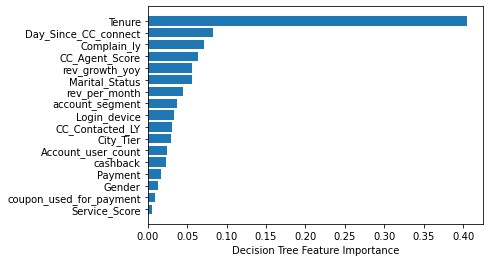

In [182]:
fig.set_size_inches(10,15)
sorted_idx = best_grid.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx],best_grid.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

In [183]:
reg_dt_imp2 = pd.DataFrame(reg_dtcl2.feature_importances_, columns = ["Imp"], 
                          index = X_train_res.columns).sort_values('Imp',ascending=False)
print(reg_dt_imp2)

                              Imp
Tenure                   0.371284
Complain_ly              0.164001
CC_Agent_Score           0.073485
Day_Since_CC_connect     0.054502
rev_per_month            0.046992
City_Tier                0.046916
CC_Contacted_LY          0.038632
rev_growth_yoy           0.033274
cashback                 0.033050
Payment                  0.026080
Account_user_count       0.021930
account_segment          0.019977
Login_device             0.017021
Service_Score            0.015310
coupon_used_for_payment  0.013148
Marital_Status           0.012632
Gender                   0.011766


Text(0.5, 0, 'Decision Tree Feature Importance ')

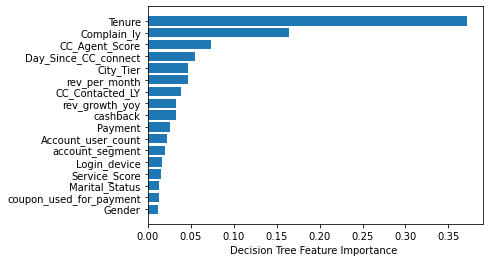

In [184]:
fig.set_size_inches(10,15)
sorted_idx = best_grid1.feature_importances_.argsort()
plt.barh(X_train_res.columns[sorted_idx],reg_dtcl2.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance ")

#XGB CLASSIFIER

In [185]:
xgb = XGBClassifier()
xgb = xgb.fit(X_train, Y_train)

In [186]:
xgb_train_predict = xgb.predict(X_train)
xgb_test_predict = xgb.predict(X_test)

In [187]:
xgb_train_acc = xgb.score(X_train,Y_train)
xgb_train_acc

0.9989850291804111

In [188]:
xgb_test_acc = xgb.score(X_test,Y_test)
xgb_test_acc

0.9739490822972173

 confusion matrix Train variables for XGB 


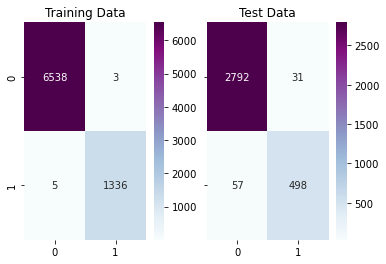

In [189]:
print(" confusion matrix Train variables for XGB ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train, xgb_train_predict)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,xgb_test_predict)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [190]:
print(classification_report(Y_train, xgb_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6541
           1       1.00      1.00      1.00      1341

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [191]:
print(classification_report(Y_test, xgb_test_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2823
           1       0.94      0.90      0.92       555

    accuracy                           0.97      3378
   macro avg       0.96      0.94      0.95      3378
weighted avg       0.97      0.97      0.97      3378



AUC: 1.000
AUC: 0.994


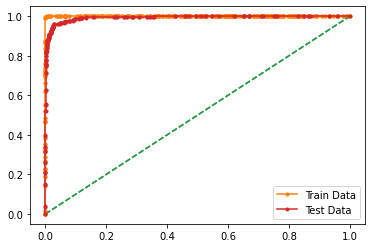

In [192]:
probs0 =xgb.predict_proba(X_train)
probs0 = probs0[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
xgb_train_auc = roc_auc_score(Y_train, probs0)
print('AUC: %.3f' % xgb_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
xgb_train_fpr, xgb_train_tpr, xgb0thresholds = roc_curve(Y_train, probs0)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_train_fpr, xgb_train_tpr, marker='.',label = 'Train Data')

probs8 = xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs8 = probs8[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
xgb_test_auc = roc_auc_score(Y_test, probs8)
print('AUC: %.3f' % xgb_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
xgb_test_fpr, xgb_test_tpr, xgb8thresholds = roc_curve(Y_test, probs8)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_test_fpr, xgb_test_tpr, marker='.',label = 'Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Text(0.5, 0, 'XGB Feature Importance')

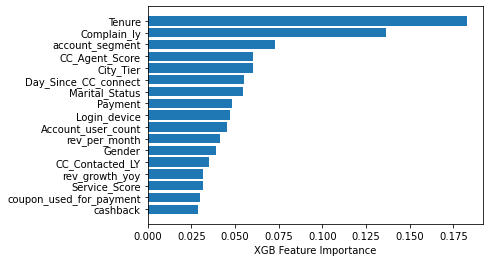

In [193]:
fig.set_size_inches(10,15)
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx],xgb.feature_importances_[sorted_idx])
plt.xlabel("XGB Feature Importance")

In [194]:
xgb_metrics=classification_report(Y_train, xgb_train_predict,output_dict=True)
df=pd.DataFrame(xgb_metrics).transpose()
xgb_train_f1=round(df.loc["0"][2],2)
xgb_train_recall=round(df.loc["0"][1],2)
xgb_train_precision=round(df.loc["0"][0],2)
df.round(2)

,precision,recall,f1-score,support
0,1.0,1.0,1.0,6541.0
1,1.0,1.0,1.0,1341.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,7882.0
weighted avg,1.0,1.0,1.0,7882.0


In [195]:
xgb_metrics=classification_report(Y_test, xgb_test_predict,output_dict=True)
df=pd.DataFrame(xgb_metrics).transpose()
xgb_test_f1=round(df.loc["0"][2],2)
xgb_test_recall=round(df.loc["0"][1],2)
xgb_test_precision=round(df.loc["0"][0],2)
df.round(2)

,precision,recall,f1-score,support
0,0.98,0.99,0.98,2823.00
1,0.94,0.90,0.92,555.00
accuracy,0.97,0.97,0.97,0.97
macro avg,0.96,0.94,0.95,3378.00
weighted avg,0.97,0.97,0.97,3378.00


In [196]:
index=['Accuracy','Recall','AUC','Precision','F1 Score']
dxg = pd.DataFrame({
        'XGB Base Train':[xgb_train_acc,xgb_train_recall,xgb_train_auc,xgb_train_precision,xgb_train_f1],
        'XGB Base Test':[xgb_test_acc,xgb_test_recall,xgb_test_auc,xgb_test_precision,xgb_test_f1]},index=index)
round(dxg,2)

,XGB Base Train,XGB Base Test
Accuracy,1.0,0.97
Recall,1.0,0.99
AUC,1.0,0.99
Precision,1.0,0.98
F1 Score,1.0,0.98


#RANDOM FOREST CLASSIFIER

In [197]:
rfcl = RandomForestClassifier()
rfcl = rfcl.fit(X_train, Y_train)

In [198]:
y_pred_testrf=rfcl.predict(X_test)
y_pred_trainrf=rfcl.predict(X_train)

In [199]:
print(classification_report(Y_train,y_pred_trainrf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6541
           1       1.00      1.00      1.00      1341

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [200]:
print(classification_report(Y_test,y_pred_testrf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2823
           1       0.96      0.88      0.92       555

    accuracy                           0.97      3378
   macro avg       0.97      0.94      0.95      3378
weighted avg       0.97      0.97      0.97      3378



In [201]:
rf_train_acc = rfcl.score(X_train,Y_train)
rf_train_acc

1.0

In [202]:
rf_test_acc = rfcl.score(X_test,Y_test)
rf_test_acc

0.9742451154529307

 confusion matrix Train variables for RFCL 


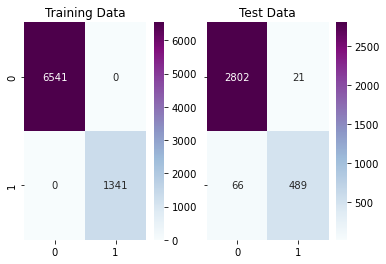

In [203]:
print(" confusion matrix Train variables for RFCL ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train, y_pred_trainrf)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,y_pred_testrf)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC: 1.000
AUC: 0.994


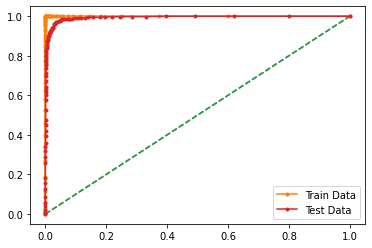

In [204]:
probs4 =rfcl.predict_proba(X_train)
probs4 = probs4[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rf_train_auc = roc_auc_score(Y_train, probs4)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_train_fpr, rf_train_tpr, thresholds = roc_curve(Y_train, probs4)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr, marker='.',label = 'Train Data')

probs5 = rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs5 = probs5[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rf_test_auc = roc_auc_score(Y_test, probs5)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_test_fpr, rf_test_tpr, thresholds = roc_curve(Y_test, probs5)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr, marker='.',label = 'Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


Text(0.5, 0, 'Random Forest Feature Importance')

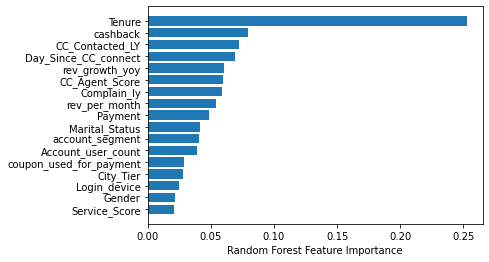

In [205]:
fig.set_size_inches(10,15)
sorted_idx =rfcl.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx],rfcl.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [206]:
rf_metrics=classification_report(Y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["0"][0],2)
rf_train_recall=round(df.loc["0"][1],2)
rf_train_f1=round(df.loc["0"][2],2)
df.round(2)

,precision,recall,f1-score,support
0,0.96,0.97,0.97,6541.00
1,0.85,0.79,0.82,1341.00
accuracy,0.94,0.94,0.94,0.94
macro avg,0.91,0.88,0.89,7882.00
weighted avg,0.94,0.94,0.94,7882.00


In [207]:
rf_metrics=classification_report(Y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["0"][0],2)
rf_test_recall=round(df.loc["0"][1],2)
rf_test_f1=round(df.loc["0"][2],2)
df.round(2)

,precision,recall,f1-score,support
0,0.94,0.95,0.95,2823.00
1,0.75,0.71,0.73,555.00
accuracy,0.91,0.91,0.91,0.91
macro avg,0.85,0.83,0.84,3378.00
weighted avg,0.91,0.91,0.91,3378.00


In [208]:
index=['Accuracy','Recall','AUC','Precision','F1 Score']
drf = pd.DataFrame({
        'RF Base Train':[rf_train_acc,rf_train_recall,rf_train_auc,rf_train_precision,rf_train_f1],
        'RF Base Test':[rf_test_acc,rf_test_recall,rf_test_auc,rf_test_precision,rf_test_f1]},index=index)
round(drf,2)

,RF Base Train,RF Base Test
Accuracy,1.00,0.97
Recall,0.97,0.95
AUC,1.00,0.99
Precision,0.96,0.94
F1 Score,0.97,0.95


#MODEL COMPARISON 

In [209]:

index=['Accuracy','Recall','AUC','Precision','F1 Score']
data = pd.DataFrame({
        'Log Smote Train':[log_smote_train_score,log_smote_train_recall,lg2_train_auc,log_smote_train_precision,log_smote_train_f1],
        'Log Smote Test':[log_smote_test_score,log_smote_test_recall,lg2_test_auc,log_smote_test_precision,log_smote_test_f1],
        'LDA Smote Train':[lda_smote_train_score,lda_smote_train_recall,lda1_train_auc,lda_smote_train_precision,lda_smote_train_f1],
        'LDA Smote Test':[lda_smote_test_score,lda_smote_test_recall,lda1_test_auc,lda_smote_test_precision,lda_smote_test_f1],
        'CART Grid Smote Train':[cart_grid_smote_train_score,cart_grid_smote_train_recall,cart_grid_smote_train_auc,cart_grid_smote_train_precision,cart_grid_smote_train_f1],
        'CART Grid Smote Test':[cart_grid_smote_test_score,cart_grid_smote_test_recall,cart_grid_smote_test_auc,cart_grid_smote_test_precision,cart_grid_smote_test_f1],
        'RF Base Train':[rf_train_acc,rf_train_recall,rf_train_auc,rf_train_precision,rf_train_f1],
        'RF Base Test':[rf_test_acc,rf_test_recall,rf_test_auc,rf_test_precision,rf_test_f1],
        'XGB Base Train':[xgb_train_acc,xgb_train_recall,xgb_train_auc,xgb_train_precision,xgb_train_f1],
        'XGB Base Test':[xgb_test_acc,xgb_test_recall,xgb_test_auc,xgb_test_precision,xgb_test_f1]},index=index)
round(data,2)

,Log Smote Train,Log Smote Test,LDA Smote Train,LDA Smote Test,CART Grid Smote Train,CART Grid Smote Test,RF Base Train,RF Base Test,XGB Base Train,XGB Base Test
Accuracy,0.78,0.76,0.77,0.74,0.96,0.91,1.00,0.97,1.0,0.97
Recall,0.76,0.75,0.74,0.73,0.96,0.94,0.97,0.95,1.0,0.99
AUC,0.86,0.85,0.84,0.84,1.00,0.94,1.00,0.99,1.0,0.99
Precision,0.79,0.95,0.79,0.94,0.96,0.95,0.96,0.94,1.0,0.98
F1 Score,0.77,0.84,0.76,0.82,0.96,0.95,0.97,0.95,1.0,0.98


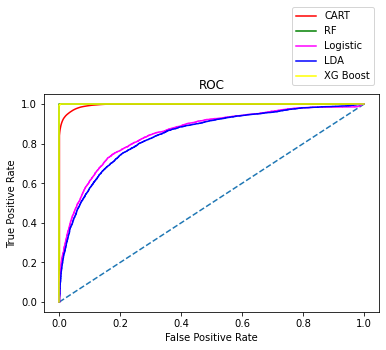

In [210]:
#train
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dtcl2_train_fpr, dtcl2_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(lg1_train_fpr,lg1_train_tpr,color='magenta',label="Logistic")
plt.plot(lda1_train_fpr,lda1_train_tpr,color='blue',label="LDA")
plt.plot(xgb_train_fpr,xgb_train_tpr,color='yellow',label="XG Boost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

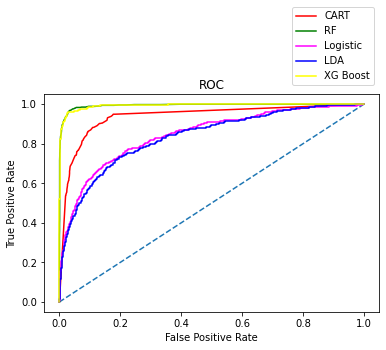

In [211]:
#test
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dtcl2_test_fpr, dtcl2_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(lg1_test_fpr,lg1_test_tpr,color='magenta',label="Logistic")
plt.plot(lda1_test_fpr,lda1_test_tpr,color='blue',label="LDA")
plt.plot(xgb_test_fpr,xgb_test_tpr,color='yellow',label="XG Boost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# THE END